In [1]:
from tnc import models
from tnc import tnc
import numpy as np
import sys
sys.path.append('/home/simon/Desktop/Code/functionlearning-contrastive')
from GP_utils import *

In [2]:
def rand_rescale(inp, min_ht=.8):
    # rescale each curve to lie completely the interval [0,1], with difference between min and max at least min_ht

    new_mins = np.random.uniform(size=len(inp), low=0, high=(1 - min_ht) / 2)
    new_maxs = np.random.uniform(size=len(inp), low=(1 + min_ht) / 2, high=1)

    # first rescale so min=0 and max=1
    outp = inp - np.min(inp, axis=1)[:, None]
    outp = outp / np.max(outp, axis=1)[:, None]

    outp = outp * (new_maxs - new_mins)[:, None] + new_mins[:, None]
    return outp


In [3]:
train = []
total_curves=10**5
xs=np.linspace(0,10,100)
for _ in range(total_curves//100):
    K, n = sample_comp_kernel() if np.random.rand() < .5 else sample_mix_kernel()
    n = 10 ** -5

    y1 = sample_gaussian(100, C=K.cov(xs, xs) + n * np.eye(len(xs)), use_svd=True)
    train.append(y1)
train = np.concatenate(train, axis=0)

train =rand_rescale(train)
train=train[:,None,:]

In [4]:
import torch

window_size = 20
device='cuda' if torch.cuda.is_available() else 'cpu'
w=.05
encoder = models.RnnEncoder(hidden_size=100, in_channel=1, encoding_size=128,device=device)
disc_model = tnc.Discriminator(encoder.encoding_size, device)
params = list(disc_model.parameters()) + list(encoder.parameters())
optimizer = torch.optim.Adam(params, lr=10**-3, weight_decay=10**-5)

(cv:0)Epoch 0 Loss =====> Training Loss: 0.65562 	 Training Accuracy: 0.61874 	 Test Loss: 0.63920 	 Test Accuracy: 0.65033
=======> Performance Summary:
Accuracy: 65.03 +- 0.00
Loss: 0.6392 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.63774 	 Training Accuracy: 0.65732 	 Test Loss: 0.61978 	 Test Accuracy: 0.67947
=======> Performance Summary:
Accuracy: 67.95 +- 0.00
Loss: 0.6198 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.64116 	 Training Accuracy: 0.65453 	 Test Loss: 0.61826 	 Test Accuracy: 0.69485
=======> Performance Summary:
Accuracy: 69.48 +- 0.00
Loss: 0.6183 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.63682 	 Training Accuracy: 0.65101 	 Test Loss: 0.61262 	 Test Accuracy: 0.68853
=======> Performance Summary:
Accuracy: 68.85 +- 0.00
Loss: 0.6126 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.62975 	 Training Accuracy: 0.66264 	 Test Loss: 0.62893 	 Test Accuracy: 0.66225
=======> Performance Summary:
Accuracy: 66.22 +- 0.00
Loss: 0.6289 +- 0.

(cv:0)Epoch 0 Loss =====> Training Loss: 0.57909 	 Training Accuracy: 0.69733 	 Test Loss: 0.54892 	 Test Accuracy: 0.73300
=======> Performance Summary:
Accuracy: 73.30 +- 0.00
Loss: 0.5489 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.56598 	 Training Accuracy: 0.71106 	 Test Loss: 0.53519 	 Test Accuracy: 0.73183
=======> Performance Summary:
Accuracy: 73.18 +- 0.00
Loss: 0.5352 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.55910 	 Training Accuracy: 0.72205 	 Test Loss: 0.53332 	 Test Accuracy: 0.73407
=======> Performance Summary:
Accuracy: 73.41 +- 0.00
Loss: 0.5333 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.55950 	 Training Accuracy: 0.71757 	 Test Loss: 0.56342 	 Test Accuracy: 0.71260
=======> Performance Summary:
Accuracy: 71.26 +- 0.00
Loss: 0.5634 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.55020 	 Training Accuracy: 0.72341 	 Test Loss: 0.59123 	 Test Accuracy: 0.69640
=======> Performance Summary:
Accuracy: 69.64 +- 0.00
Loss: 0.5912 +- 0.

(cv:0)Epoch 0 Loss =====> Training Loss: 0.53822 	 Training Accuracy: 0.73278 	 Test Loss: 0.53873 	 Test Accuracy: 0.73295
=======> Performance Summary:
Accuracy: 73.30 +- 0.00
Loss: 0.5387 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.53892 	 Training Accuracy: 0.73690 	 Test Loss: 0.53149 	 Test Accuracy: 0.74425
=======> Performance Summary:
Accuracy: 74.42 +- 0.00
Loss: 0.5315 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.52282 	 Training Accuracy: 0.74791 	 Test Loss: 0.53540 	 Test Accuracy: 0.73360
=======> Performance Summary:
Accuracy: 73.36 +- 0.00
Loss: 0.5354 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.52884 	 Training Accuracy: 0.74352 	 Test Loss: 0.54648 	 Test Accuracy: 0.71747
=======> Performance Summary:
Accuracy: 71.75 +- 0.00
Loss: 0.5465 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.53665 	 Training Accuracy: 0.73795 	 Test Loss: 0.51952 	 Test Accuracy: 0.74627
=======> Performance Summary:
Accuracy: 74.63 +- 0.00
Loss: 0.5195 +- 0.

(cv:0)Epoch 0 Loss =====> Training Loss: 0.51343 	 Training Accuracy: 0.75149 	 Test Loss: 0.51663 	 Test Accuracy: 0.75105
=======> Performance Summary:
Accuracy: 75.11 +- 0.00
Loss: 0.5166 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.52101 	 Training Accuracy: 0.74946 	 Test Loss: 0.52266 	 Test Accuracy: 0.75230
=======> Performance Summary:
Accuracy: 75.23 +- 0.00
Loss: 0.5227 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.51378 	 Training Accuracy: 0.75093 	 Test Loss: 0.53775 	 Test Accuracy: 0.73063
=======> Performance Summary:
Accuracy: 73.06 +- 0.00
Loss: 0.5378 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.50867 	 Training Accuracy: 0.75509 	 Test Loss: 0.51596 	 Test Accuracy: 0.74255
=======> Performance Summary:
Accuracy: 74.25 +- 0.00
Loss: 0.5160 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.52366 	 Training Accuracy: 0.75149 	 Test Loss: 0.51891 	 Test Accuracy: 0.74525
=======> Performance Summary:
Accuracy: 74.53 +- 0.00
Loss: 0.5189 +- 0.

(cv:0)Epoch 0 Loss =====> Training Loss: 0.51220 	 Training Accuracy: 0.74781 	 Test Loss: 0.50360 	 Test Accuracy: 0.76022
=======> Performance Summary:
Accuracy: 76.02 +- 0.00
Loss: 0.5036 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.50447 	 Training Accuracy: 0.76356 	 Test Loss: 0.53048 	 Test Accuracy: 0.73208
=======> Performance Summary:
Accuracy: 73.21 +- 0.00
Loss: 0.5305 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.50677 	 Training Accuracy: 0.75630 	 Test Loss: 0.49530 	 Test Accuracy: 0.75982
=======> Performance Summary:
Accuracy: 75.98 +- 0.00
Loss: 0.4953 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.48762 	 Training Accuracy: 0.77313 	 Test Loss: 0.50362 	 Test Accuracy: 0.75687
=======> Performance Summary:
Accuracy: 75.69 +- 0.00
Loss: 0.5036 +- 0.0000
(cv:0)Epoch 0 Loss =====> Training Loss: 0.49275 	 Training Accuracy: 0.76651 	 Test Loss: 0.49329 	 Test Accuracy: 0.76915
=======> Performance Summary:
Accuracy: 76.92 +- 0.00
Loss: 0.4933 +- 0.

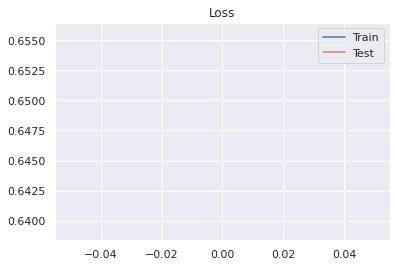

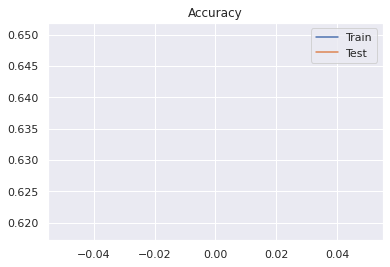

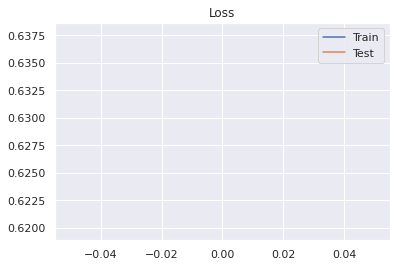

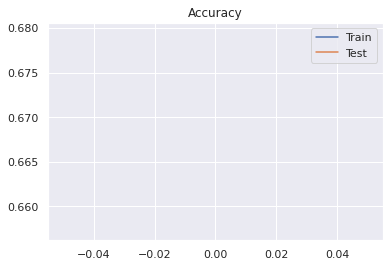

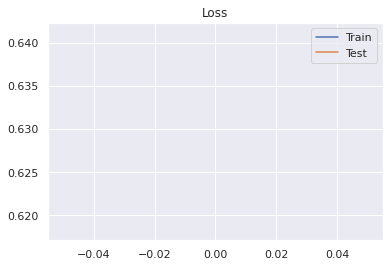

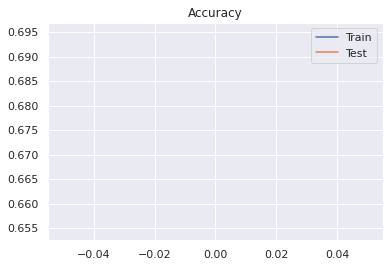

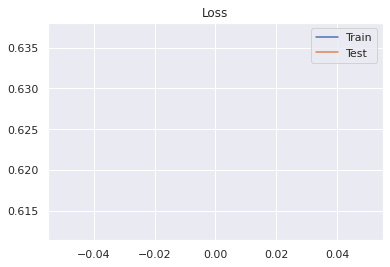

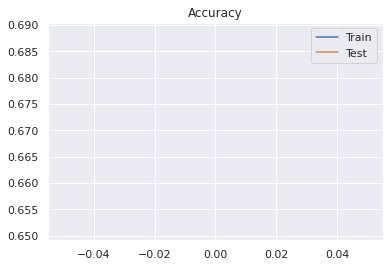

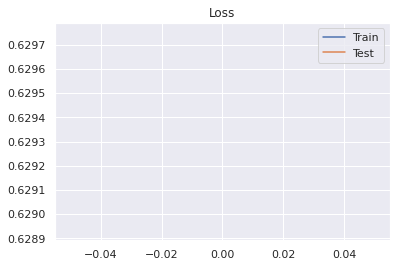

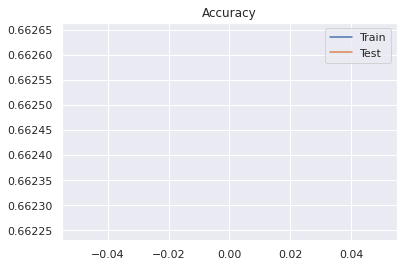

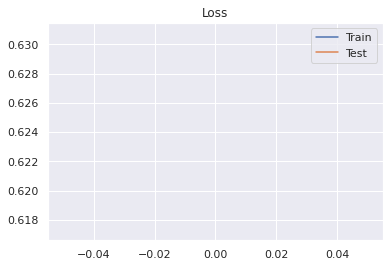

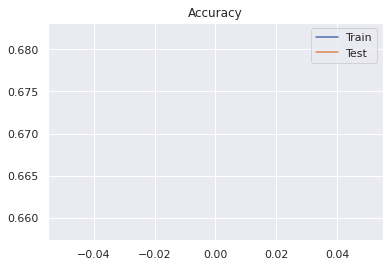

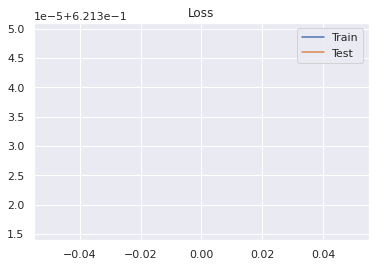

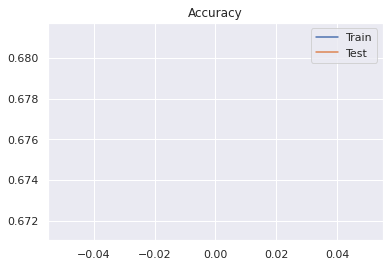

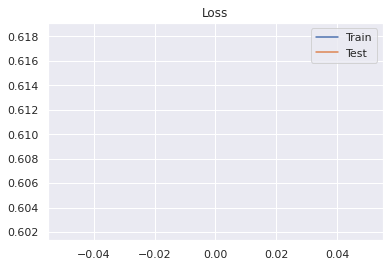

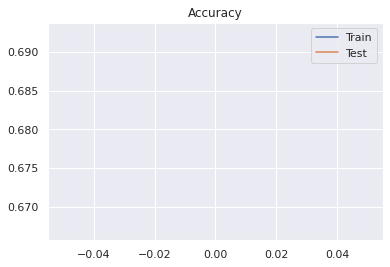

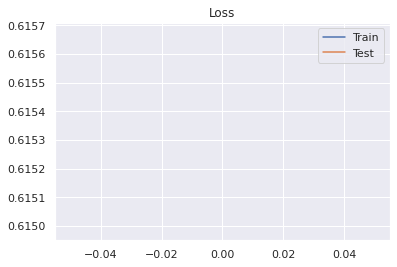

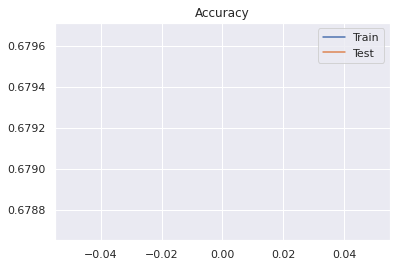

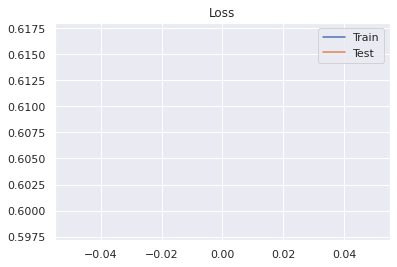

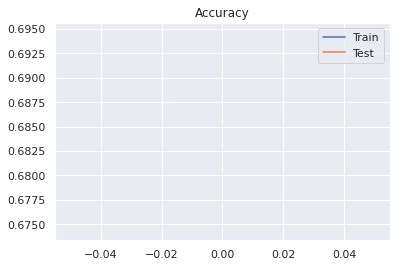

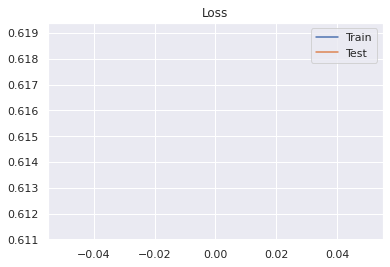

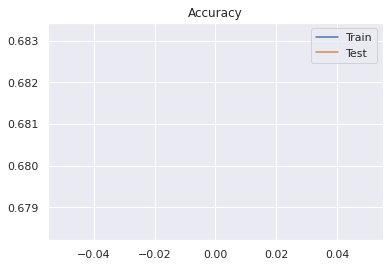

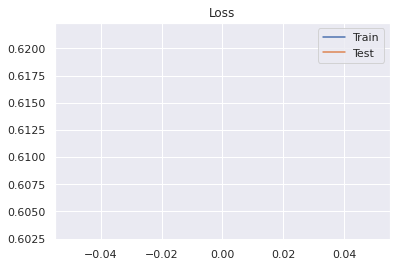

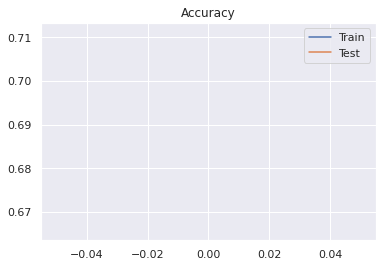

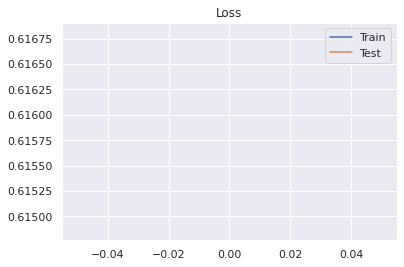

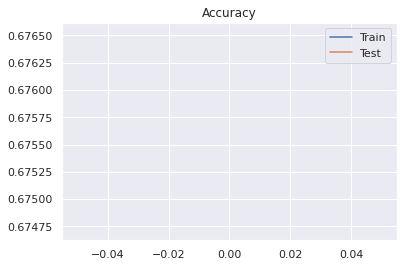

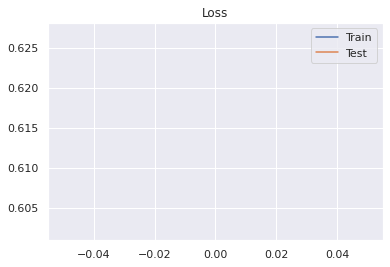

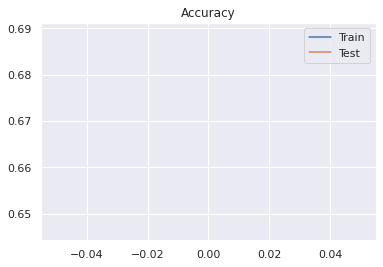

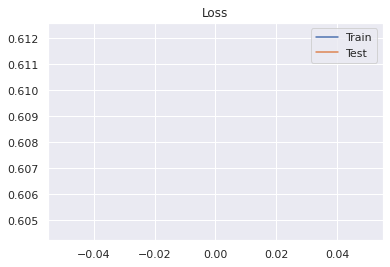

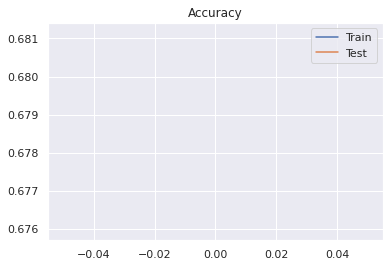

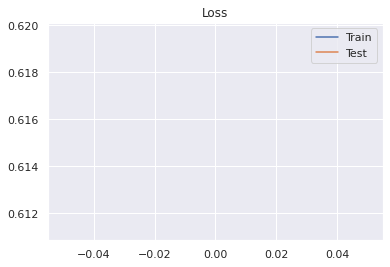

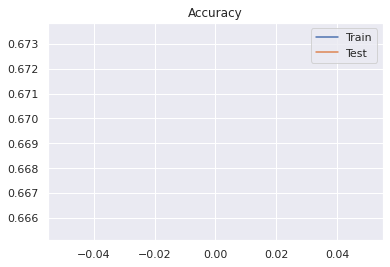

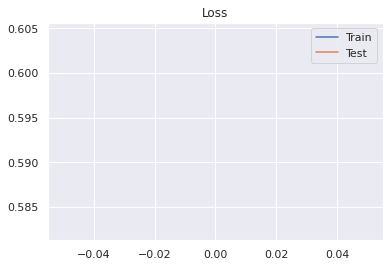

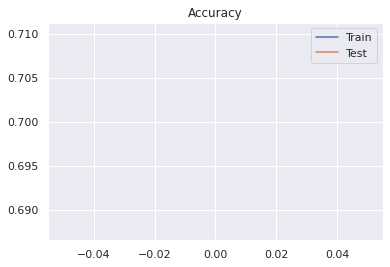

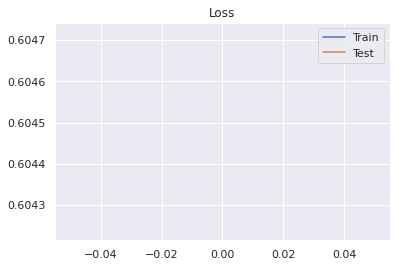

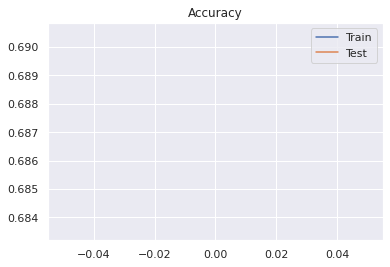

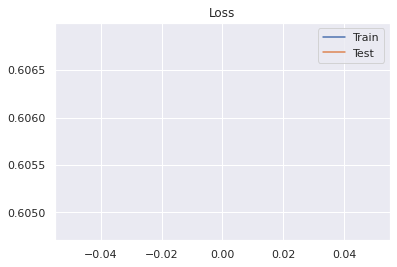

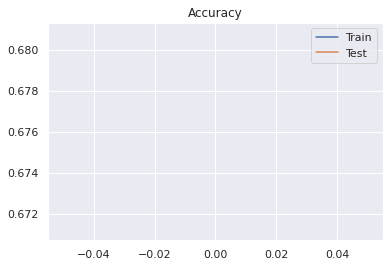

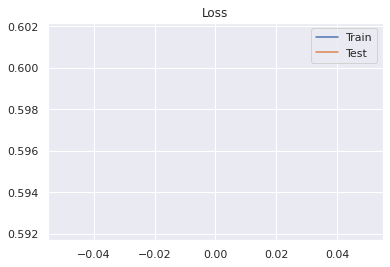

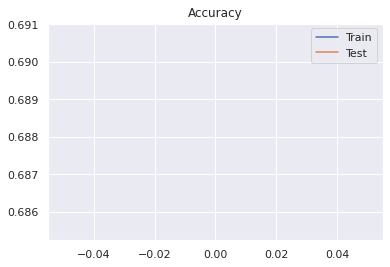

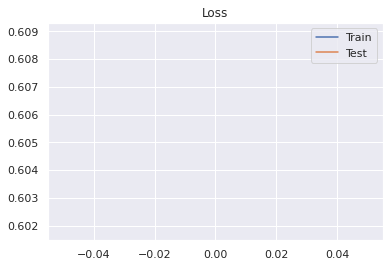

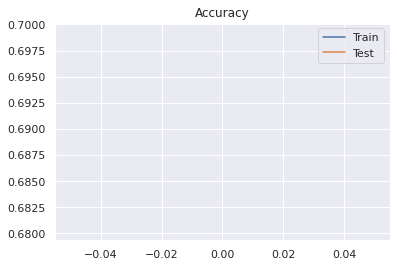

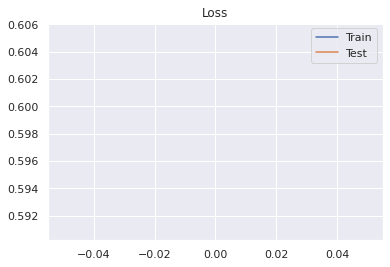

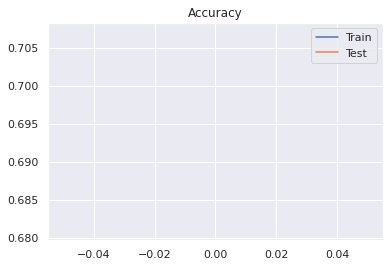

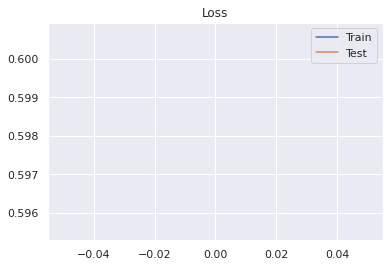

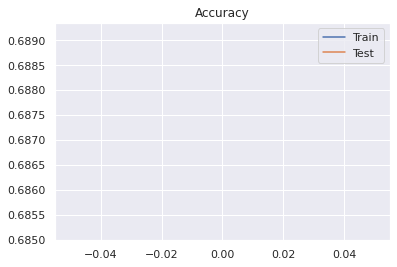

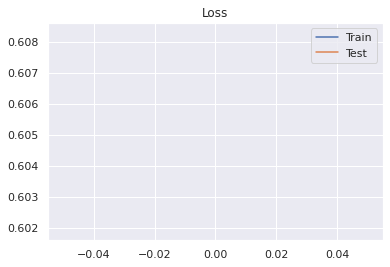

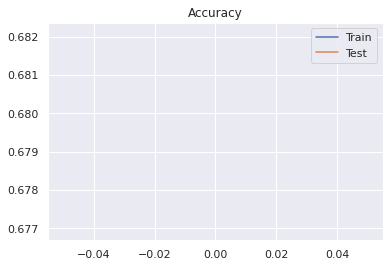

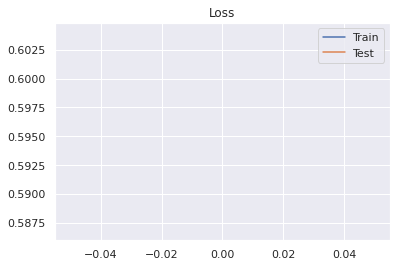

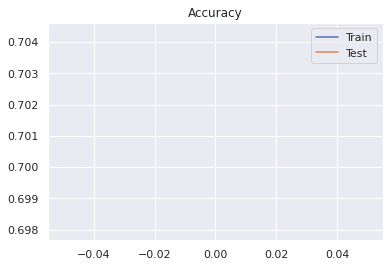

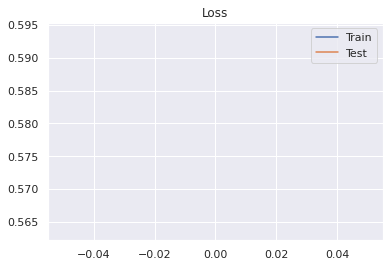

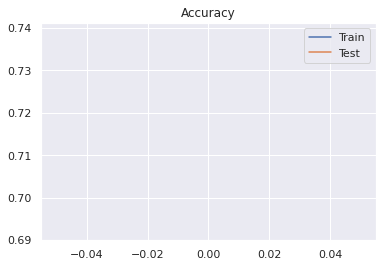

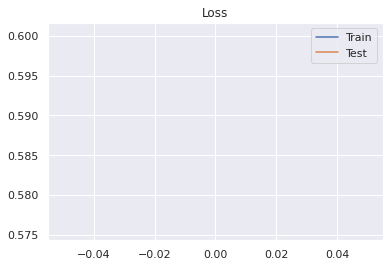

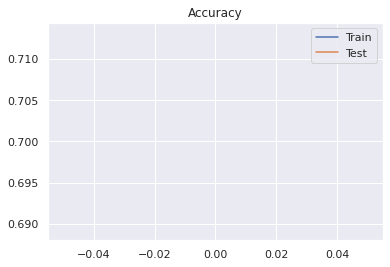

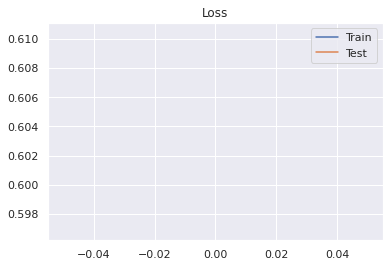

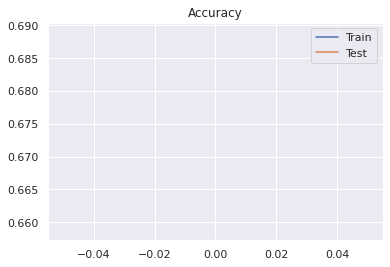

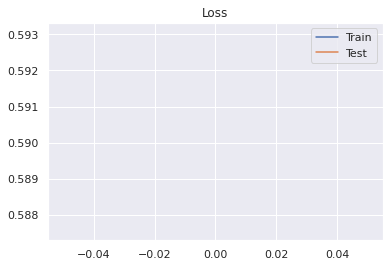

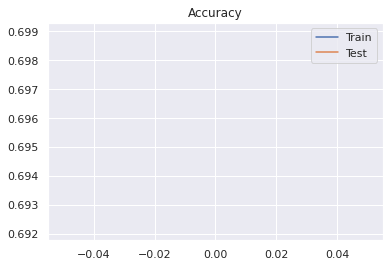

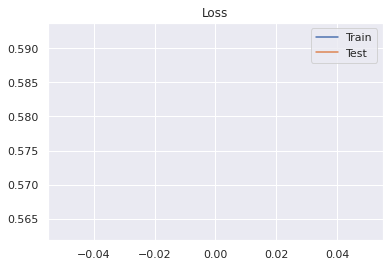

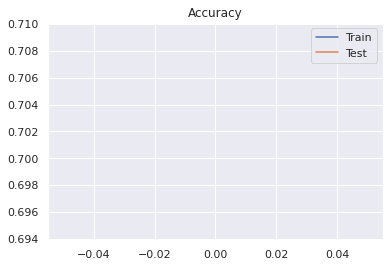

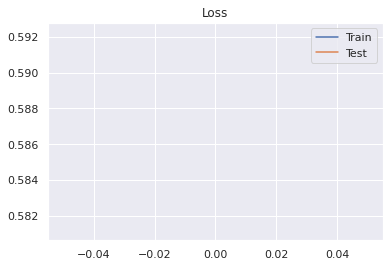

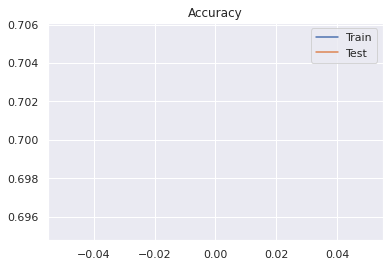

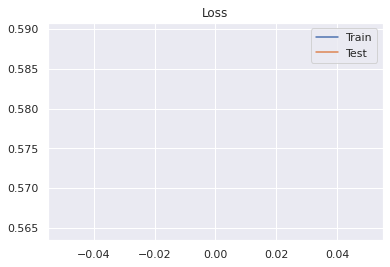

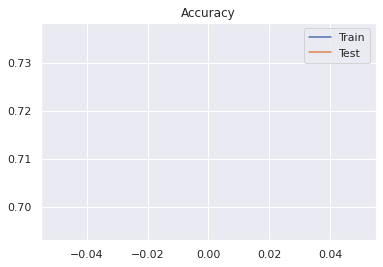

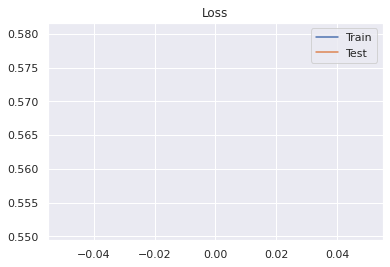

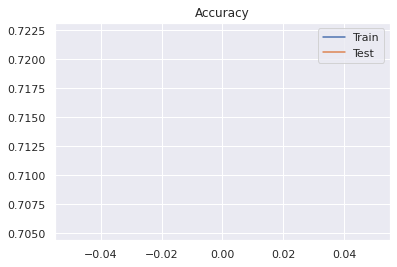

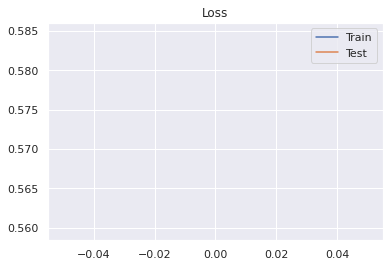

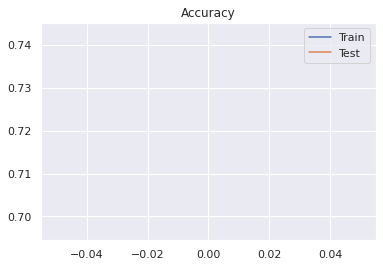

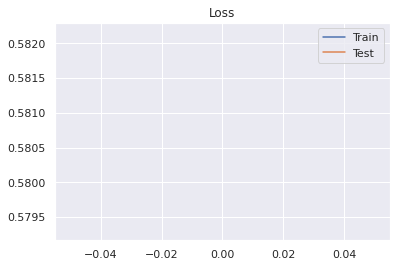

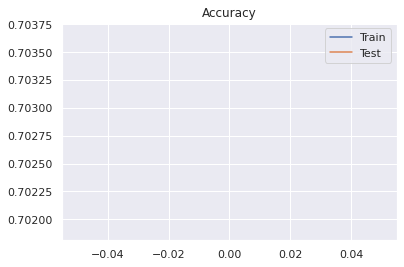

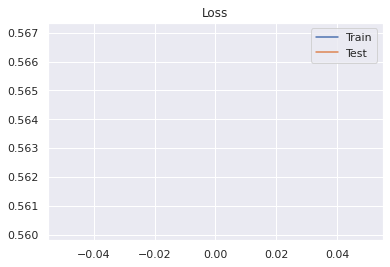

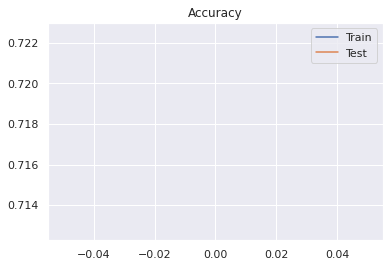

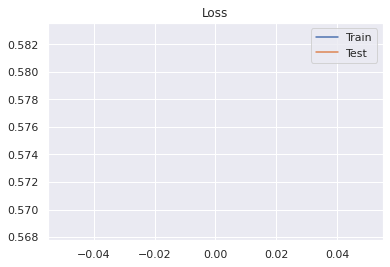

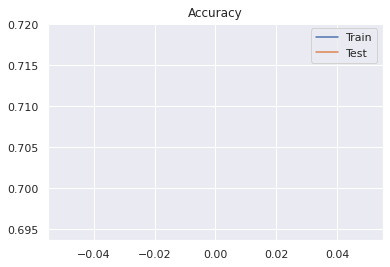

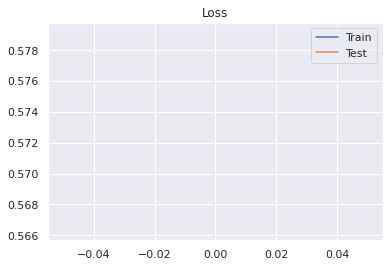

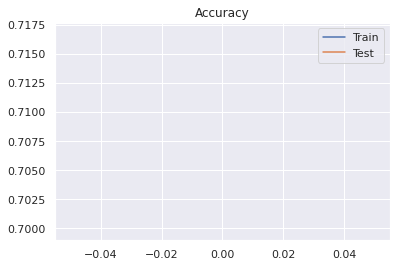

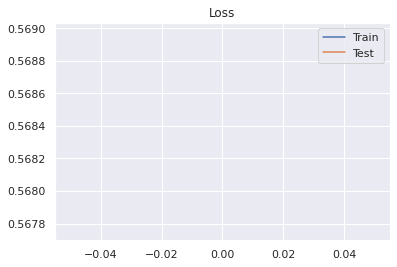

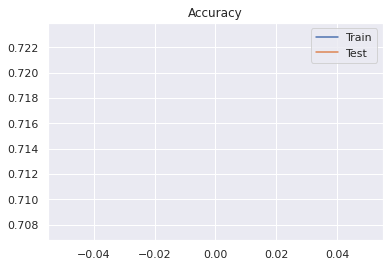

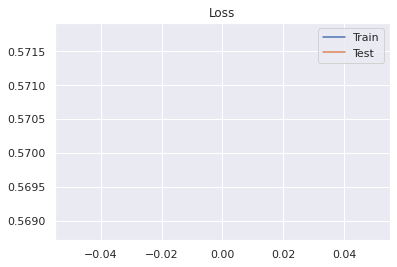

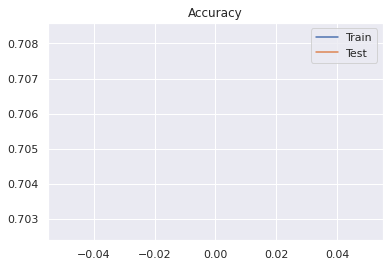

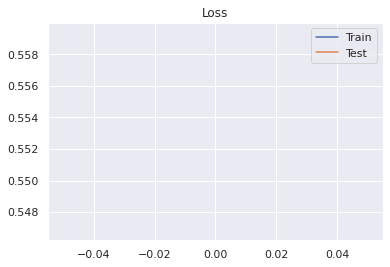

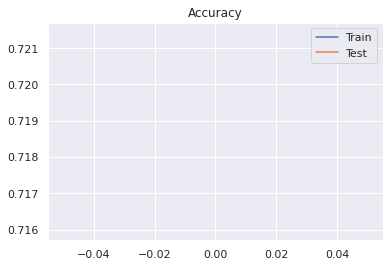

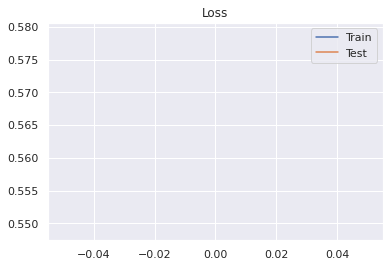

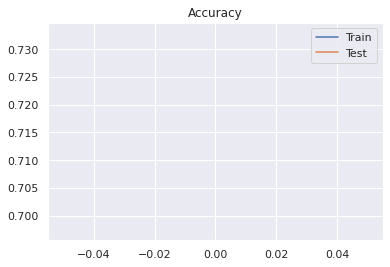

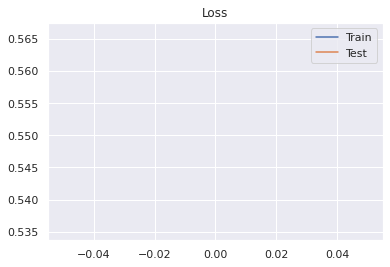

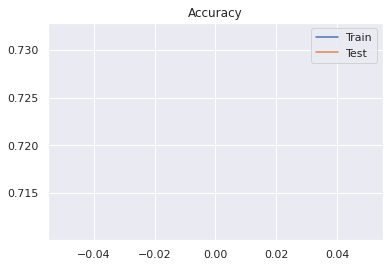

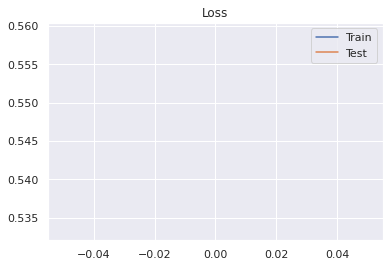

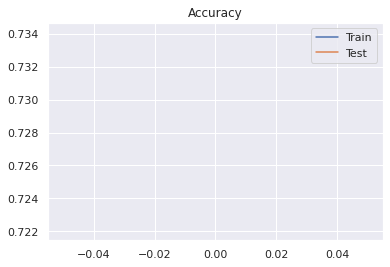

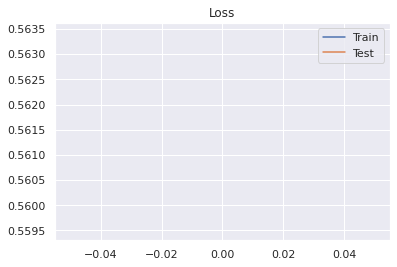

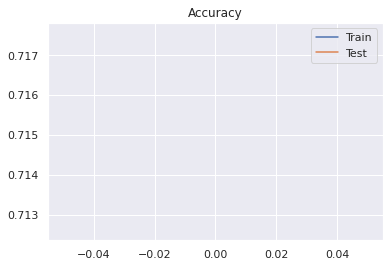

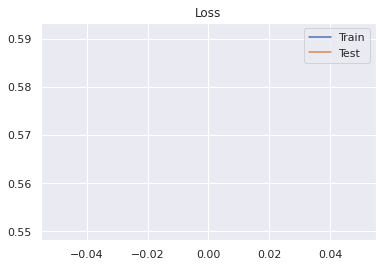

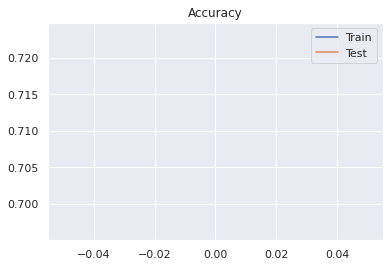

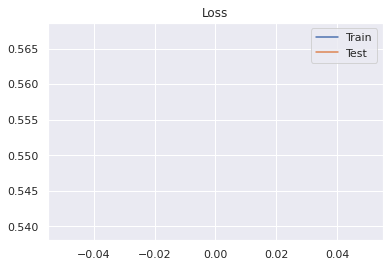

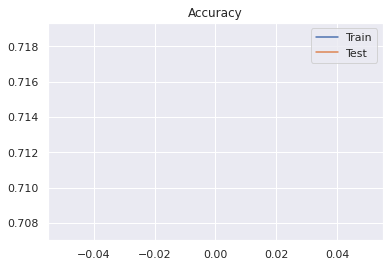

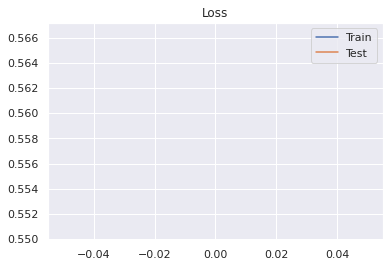

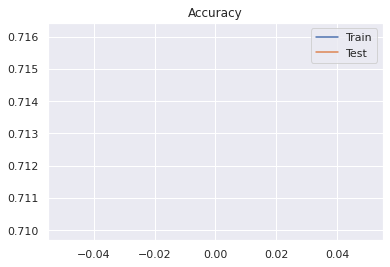

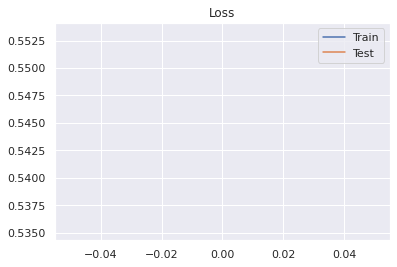

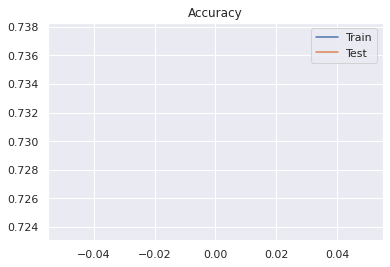

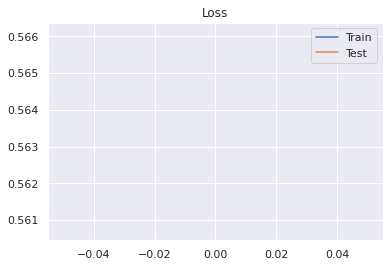

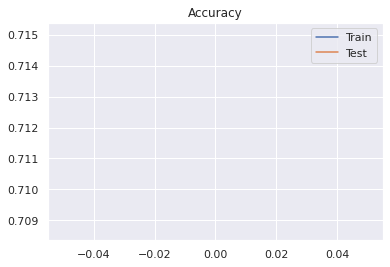

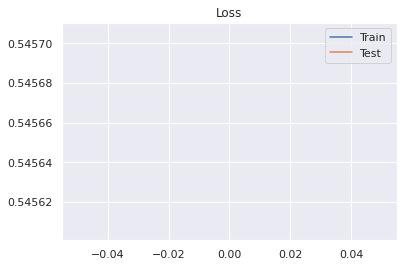

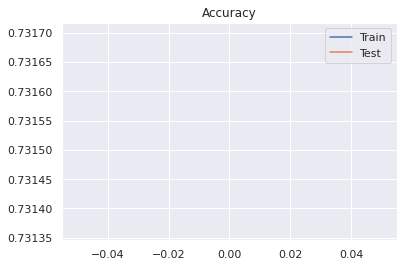

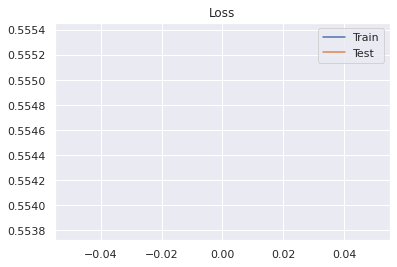

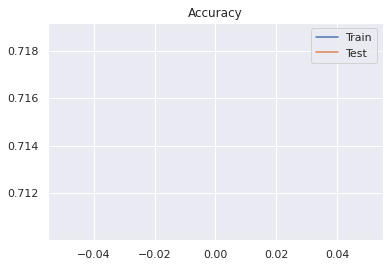

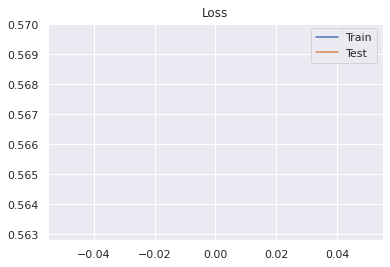

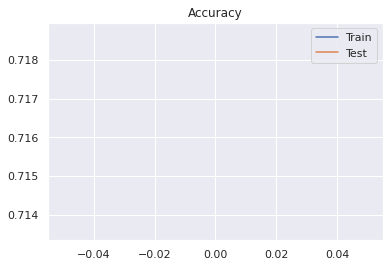

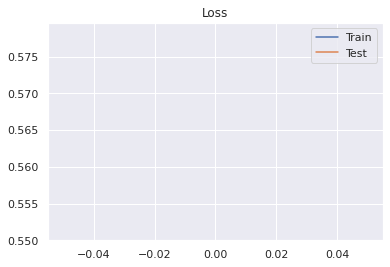

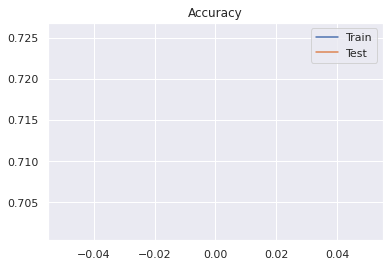

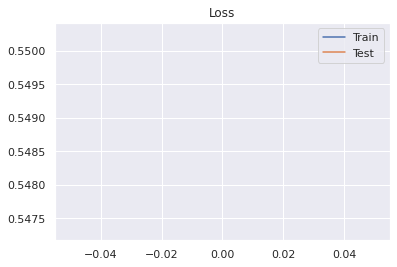

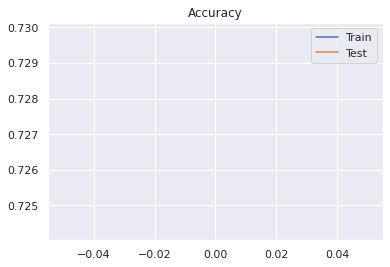

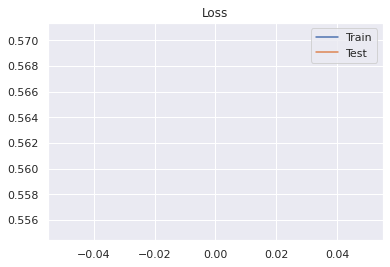

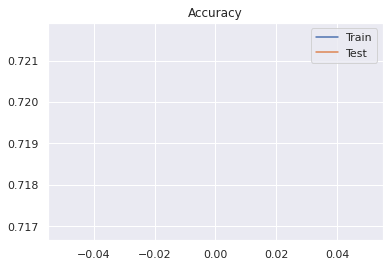

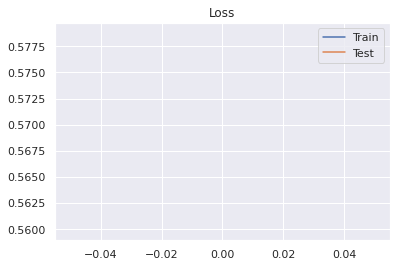

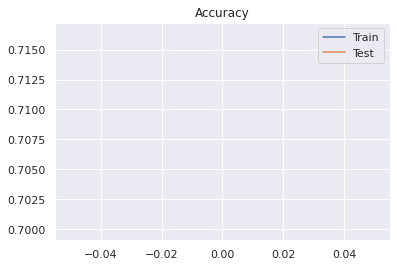

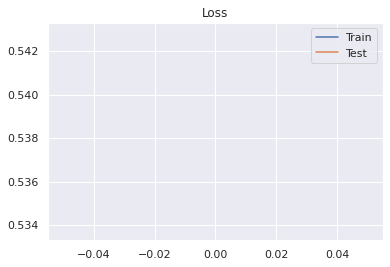

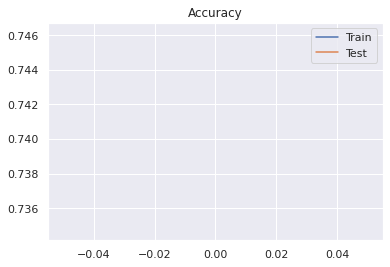

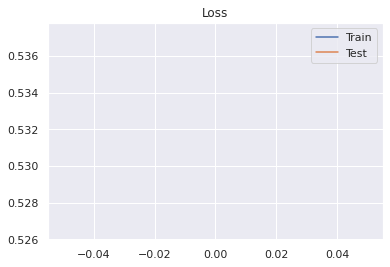

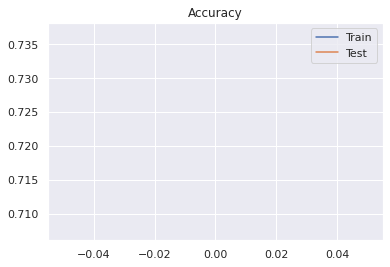

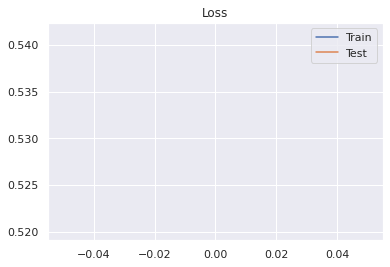

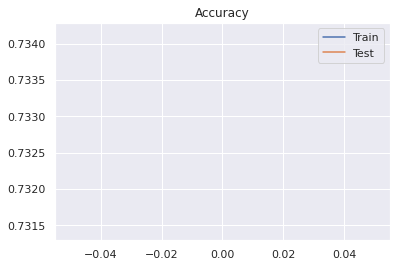

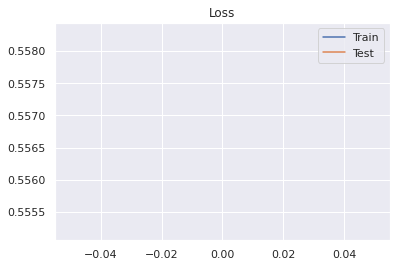

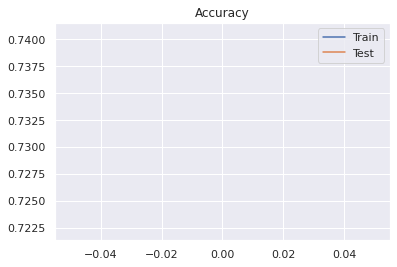

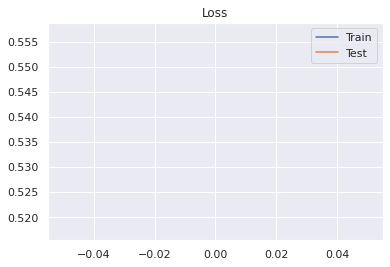

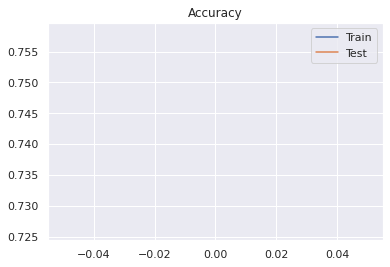

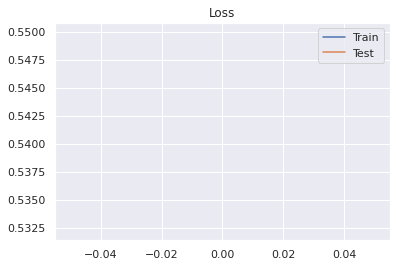

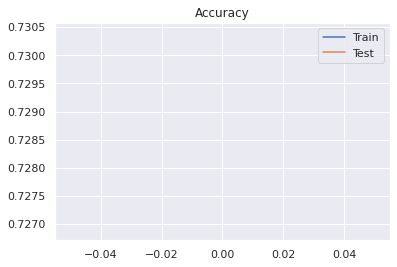

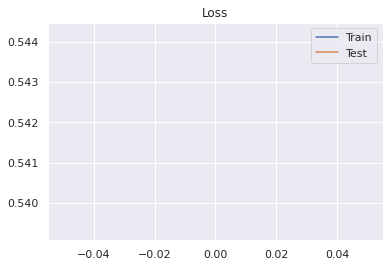

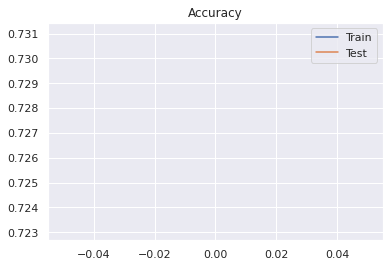

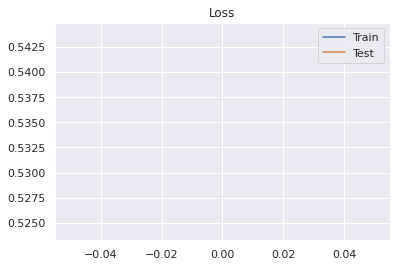

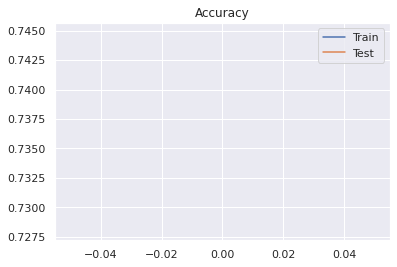

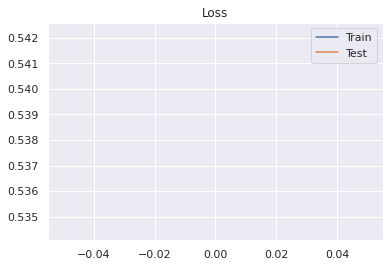

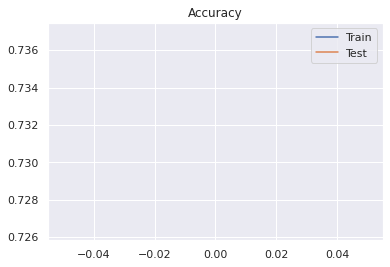

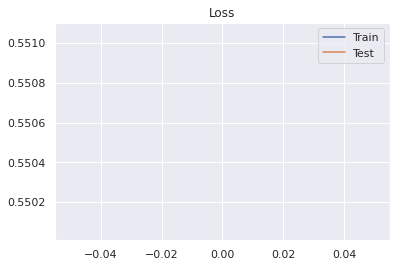

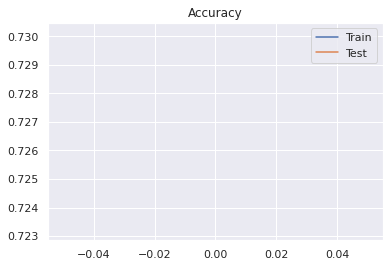

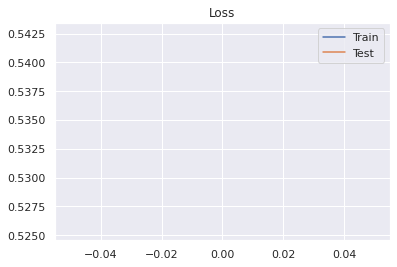

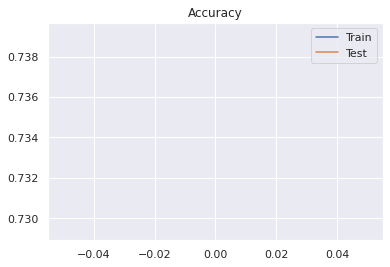

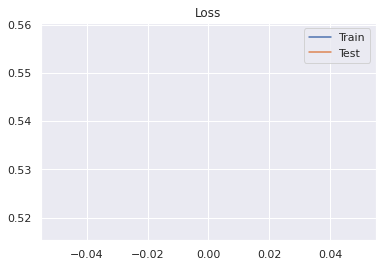

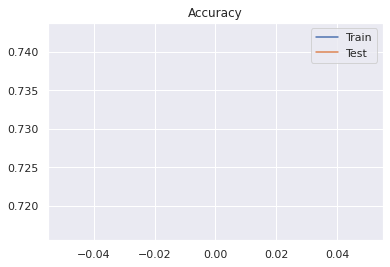

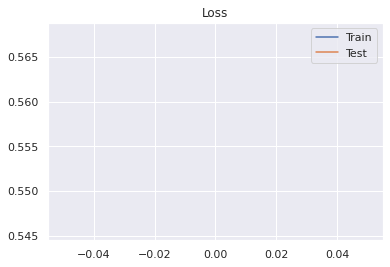

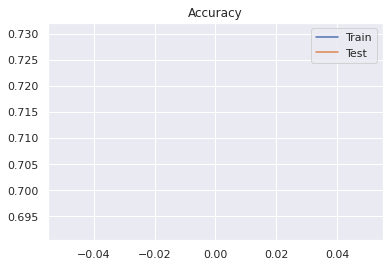

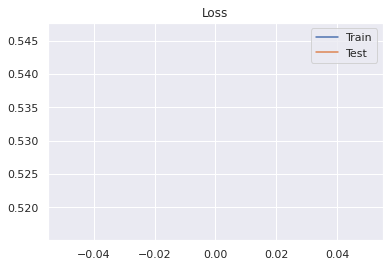

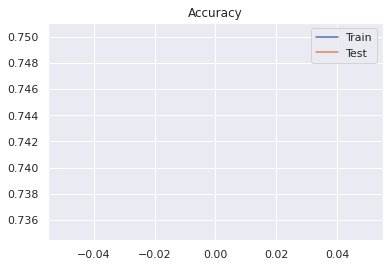

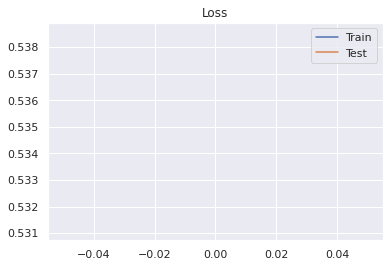

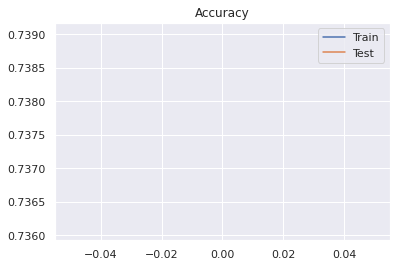

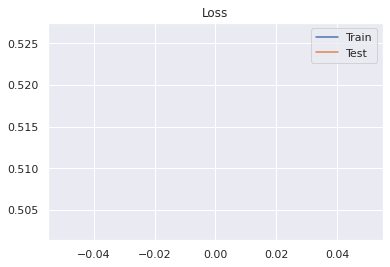

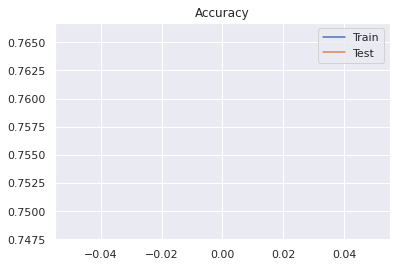

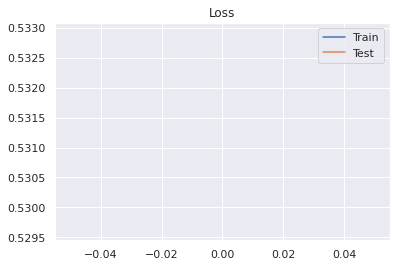

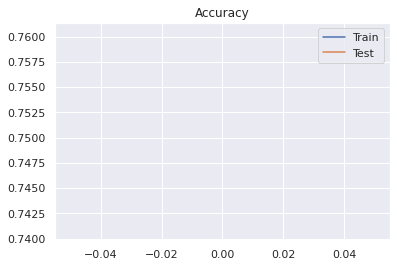

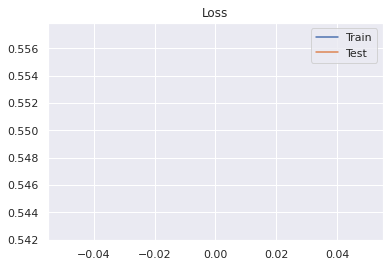

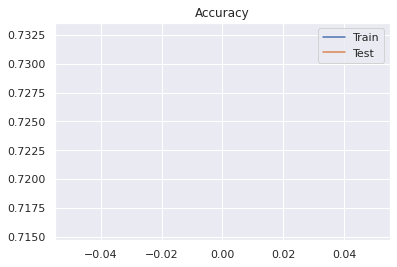

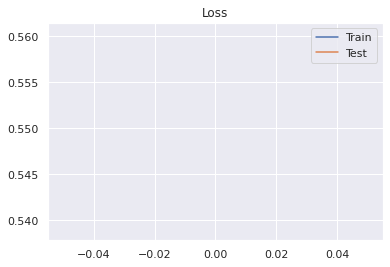

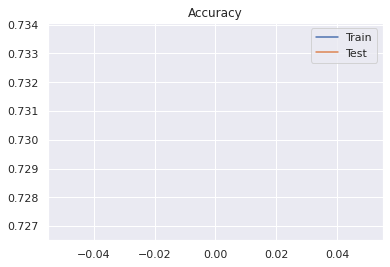

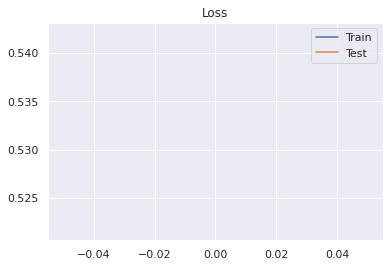

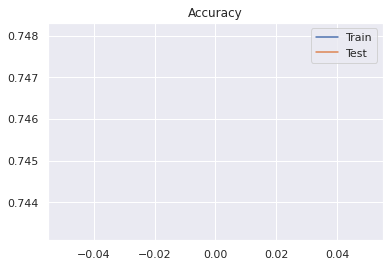

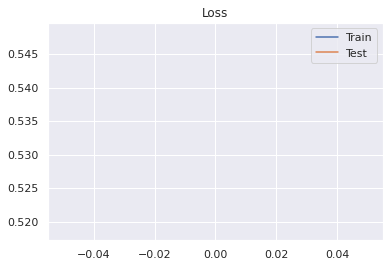

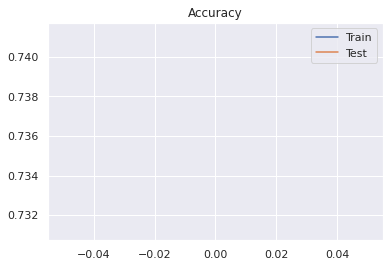

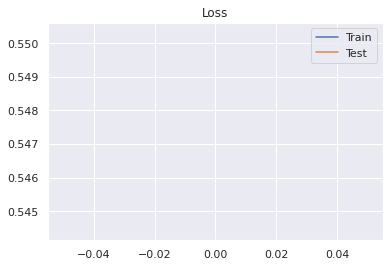

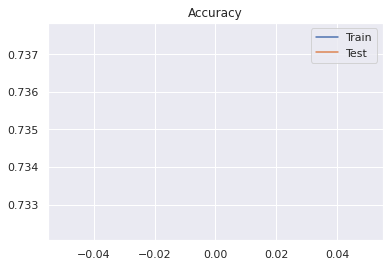

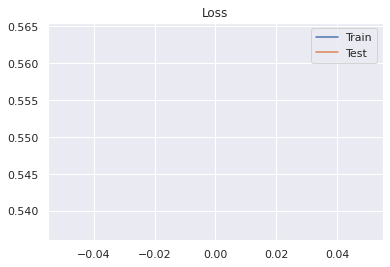

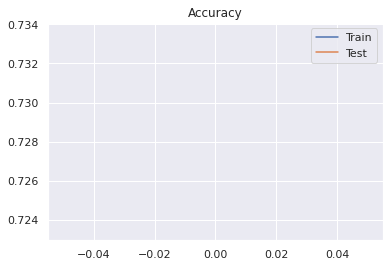

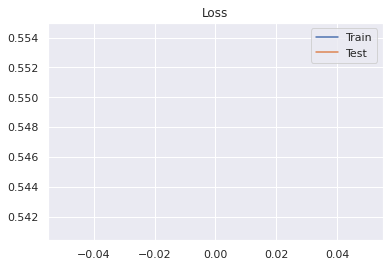

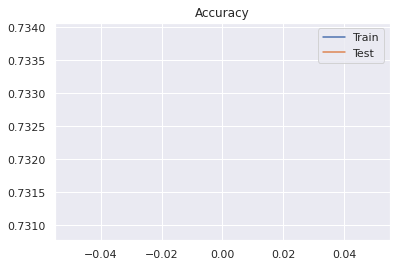

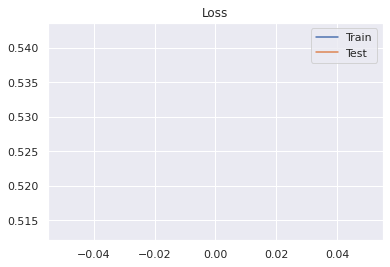

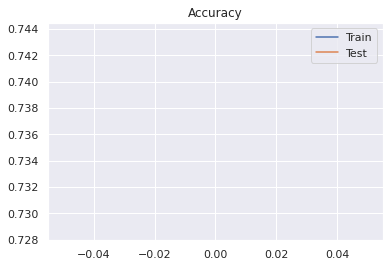

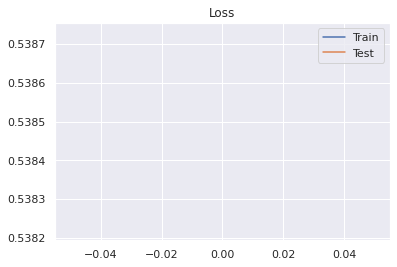

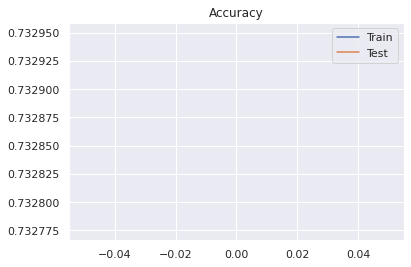

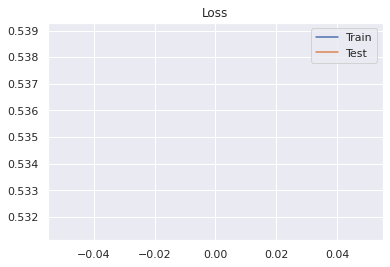

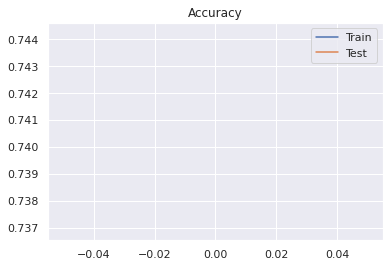

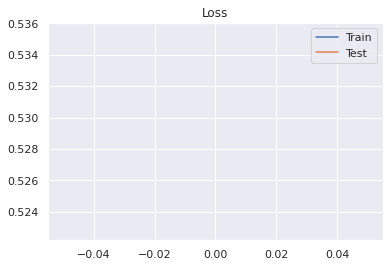

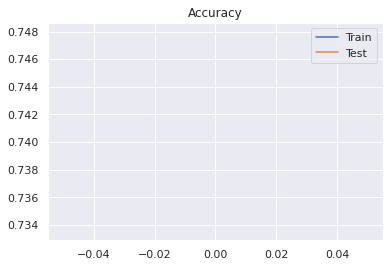

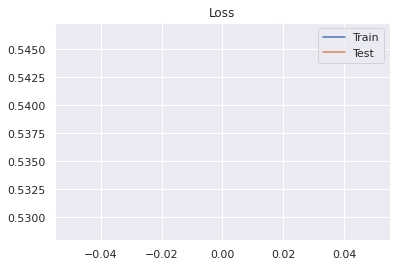

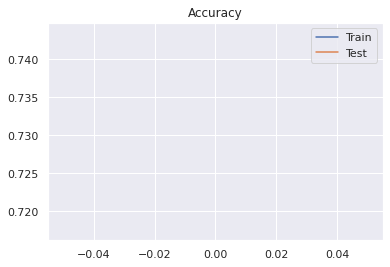

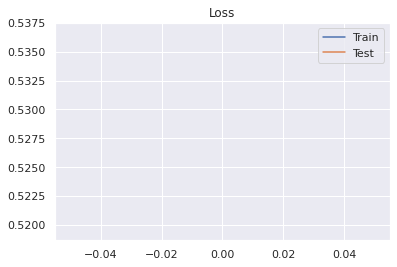

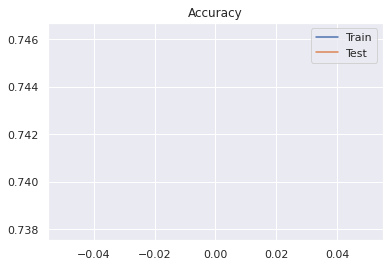

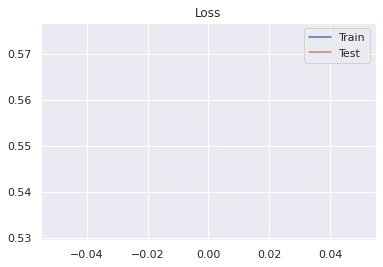

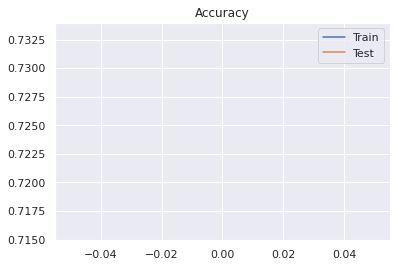

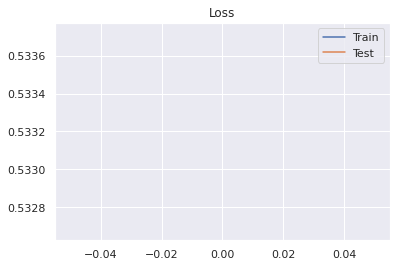

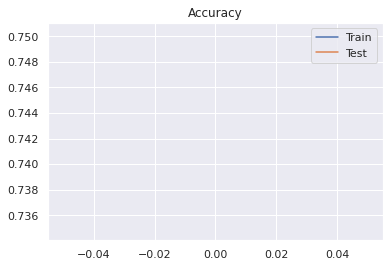

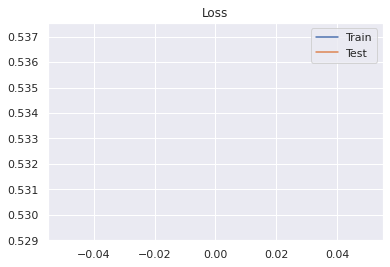

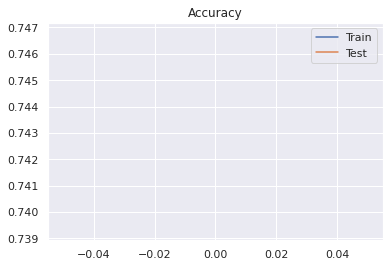

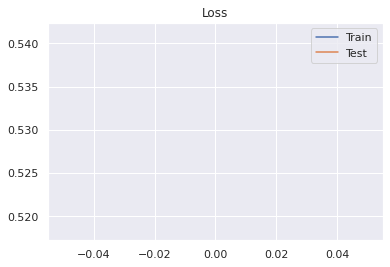

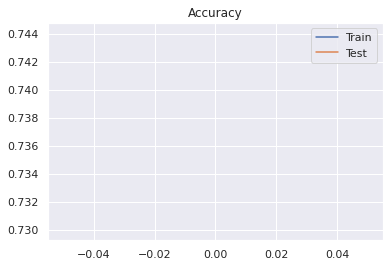

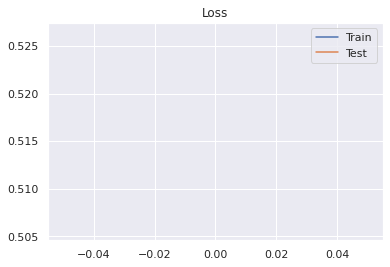

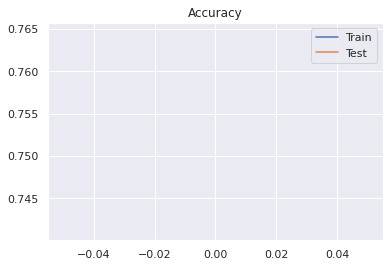

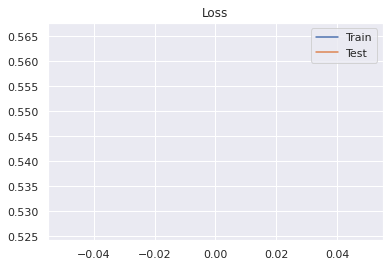

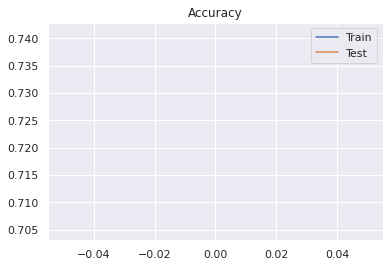

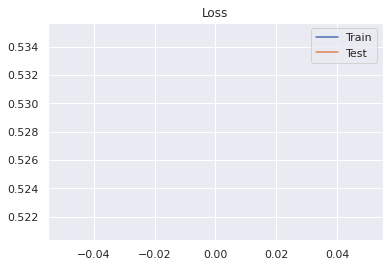

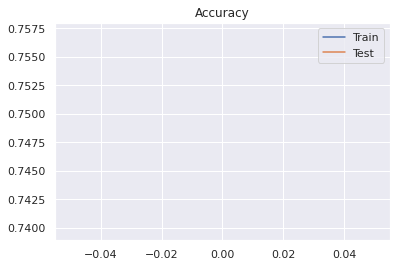

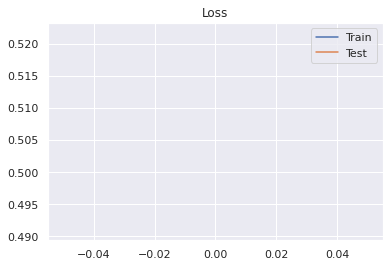

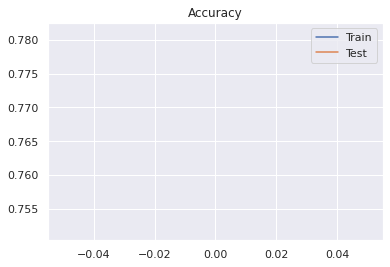

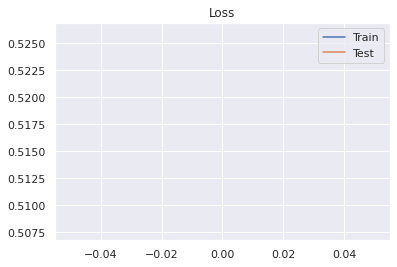

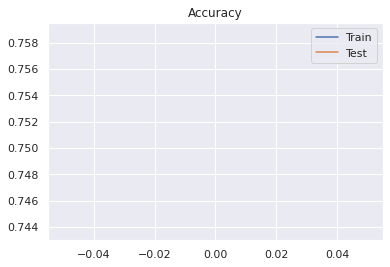

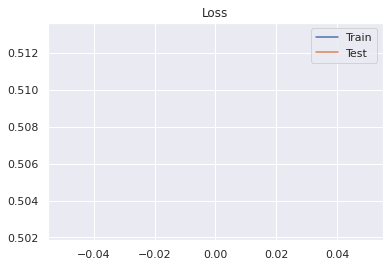

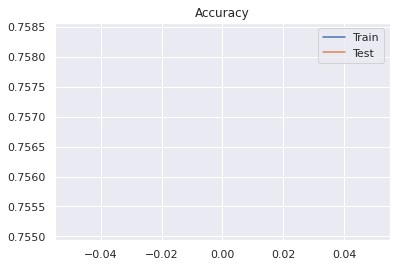

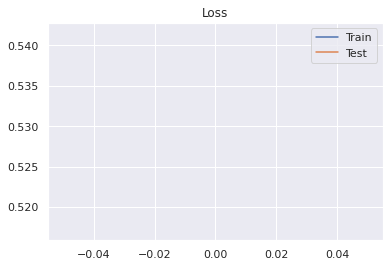

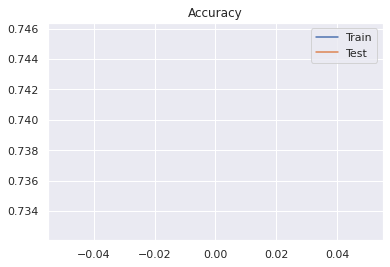

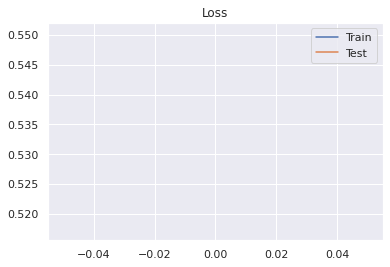

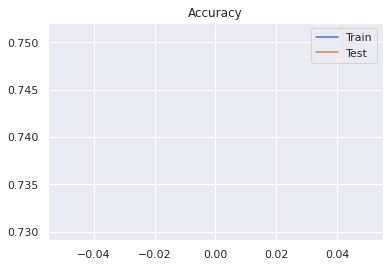

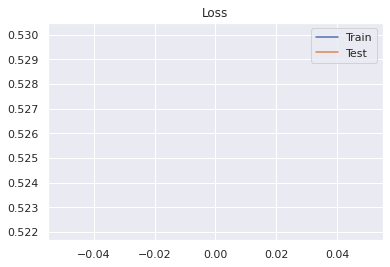

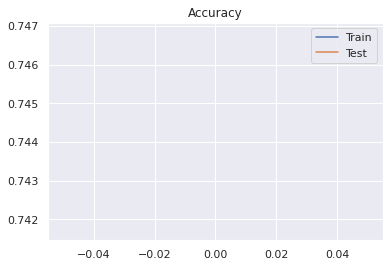

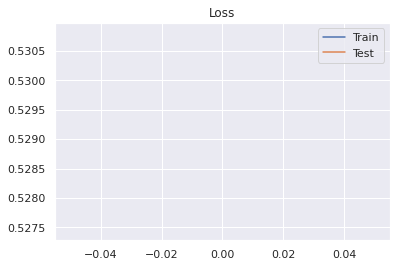

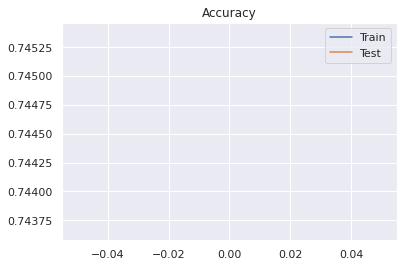

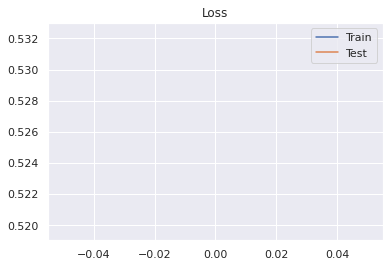

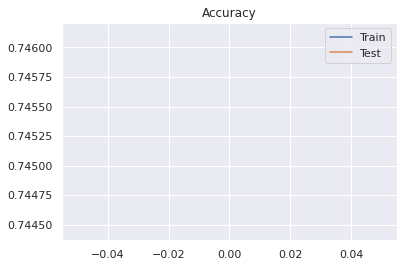

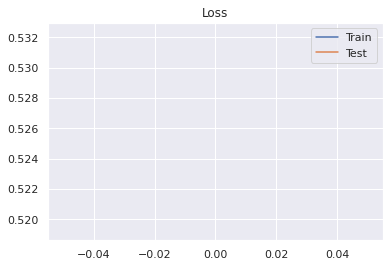

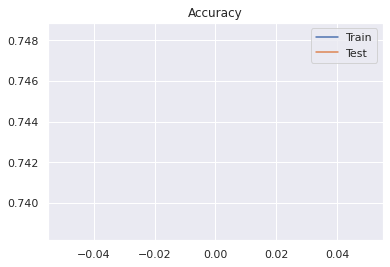

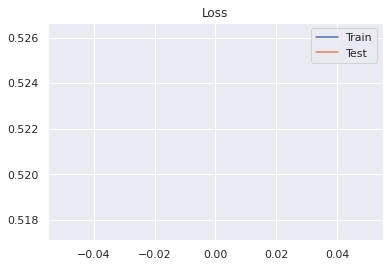

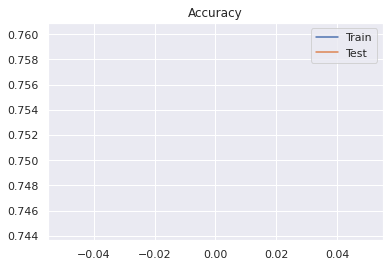

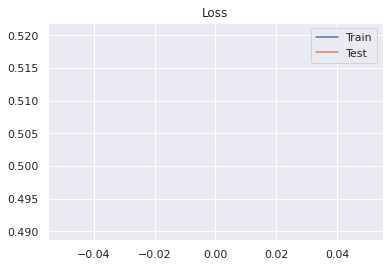

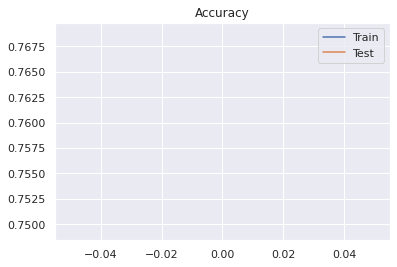

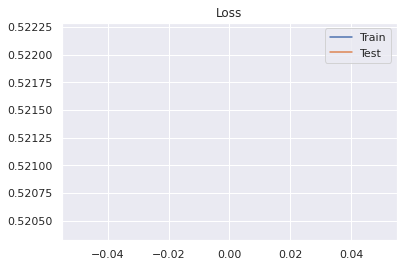

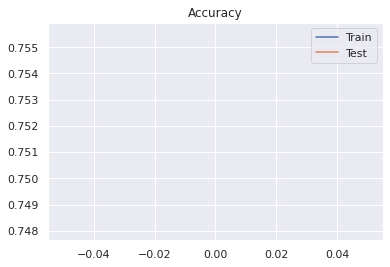

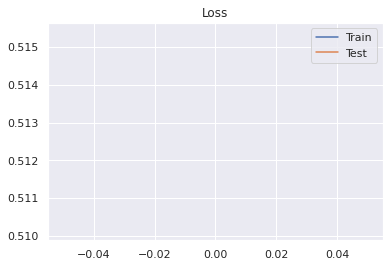

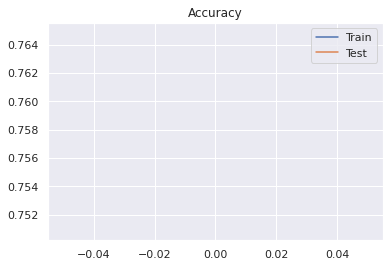

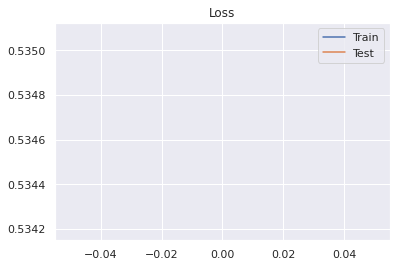

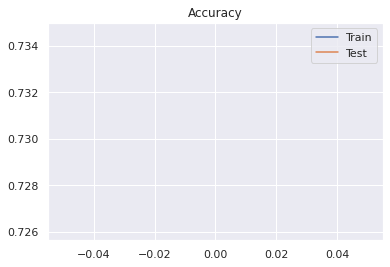

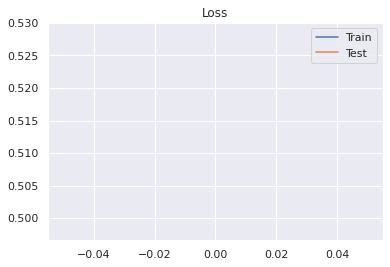

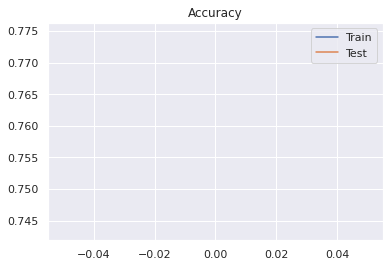

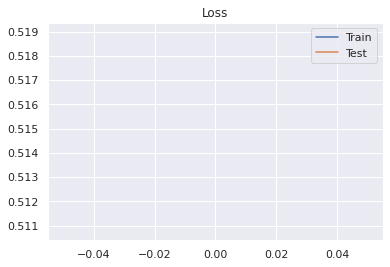

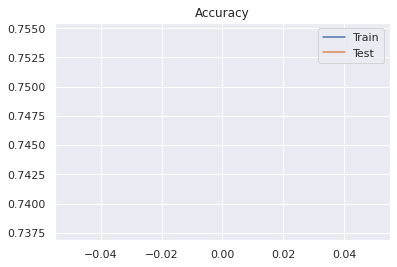

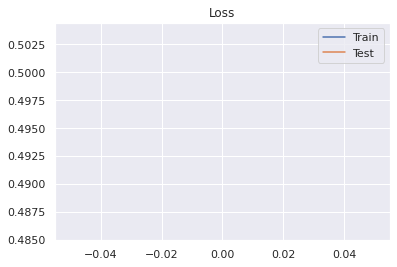

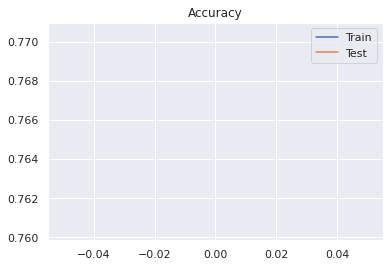

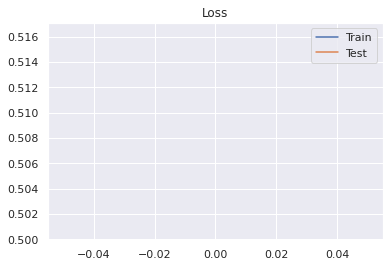

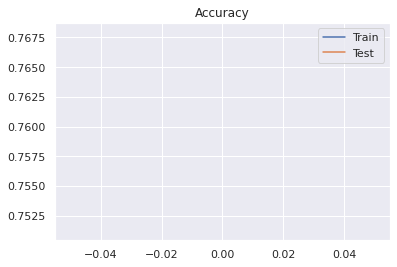

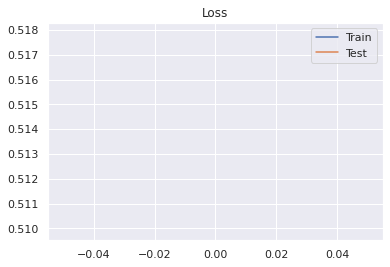

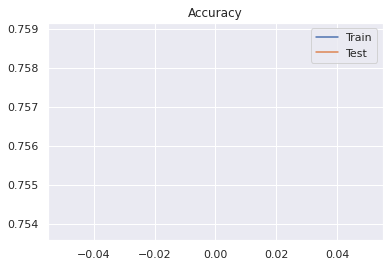

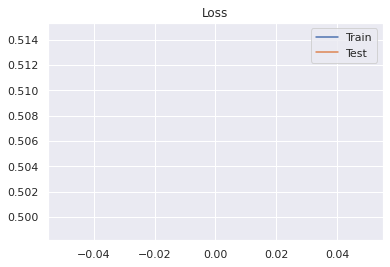

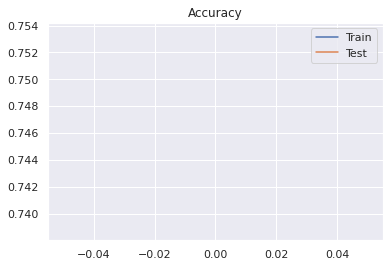

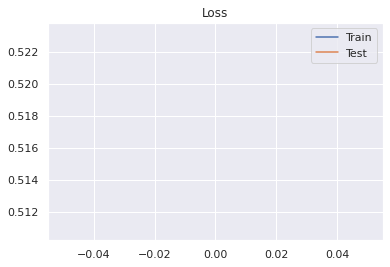

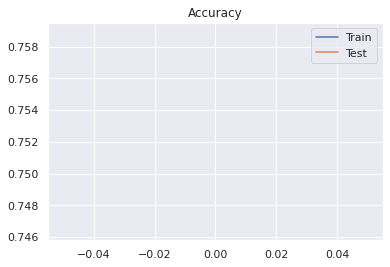

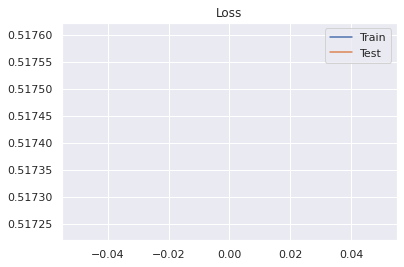

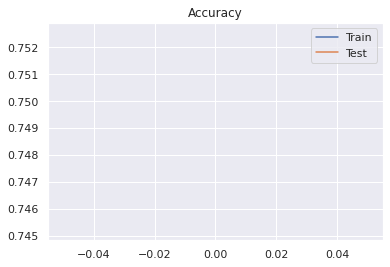

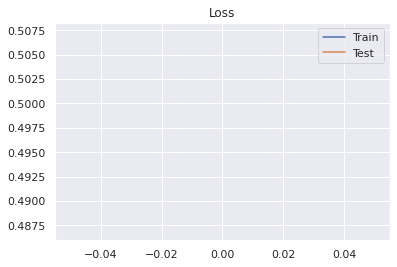

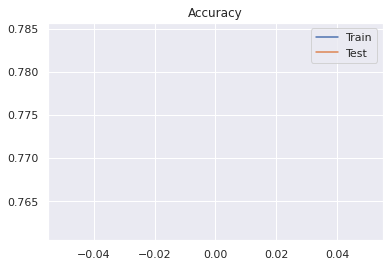

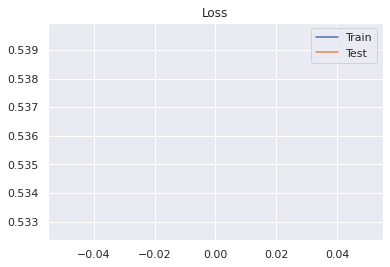

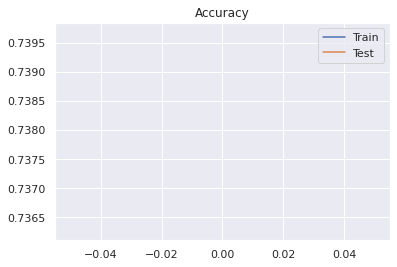

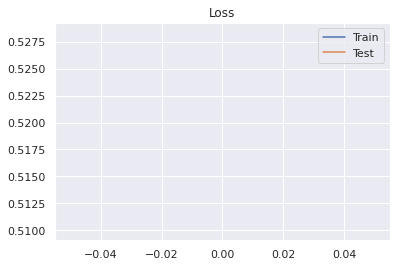

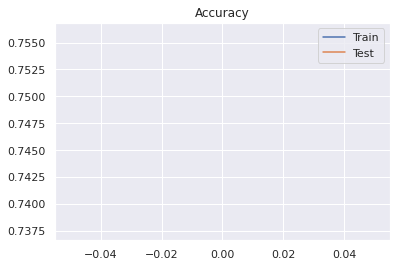

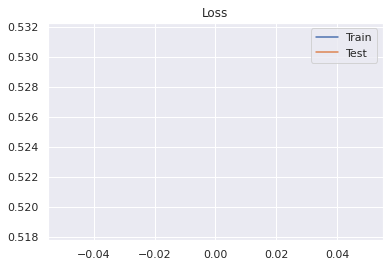

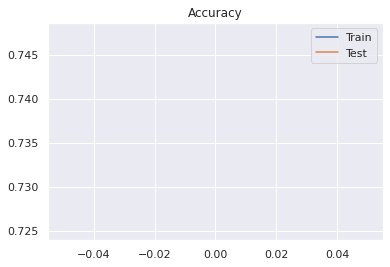

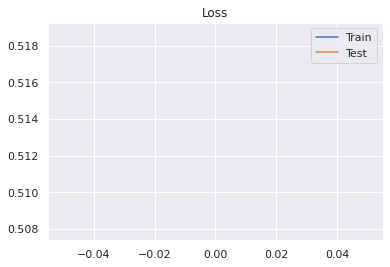

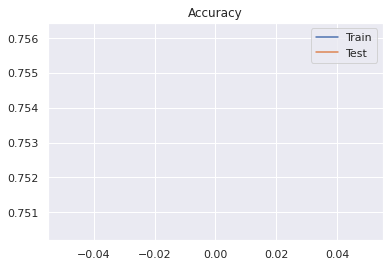

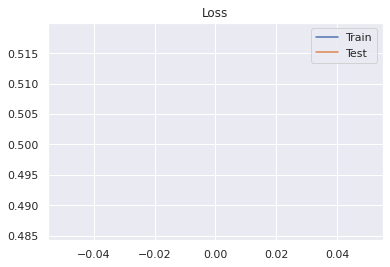

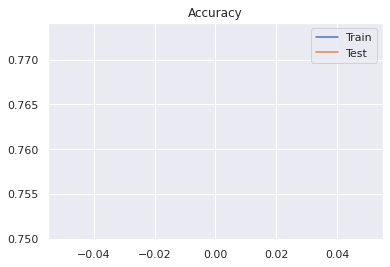

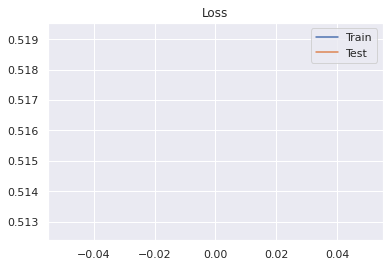

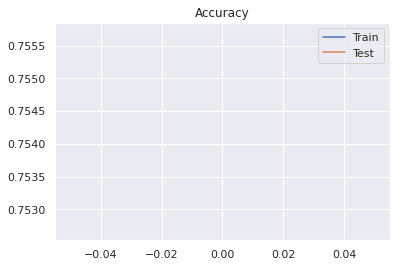

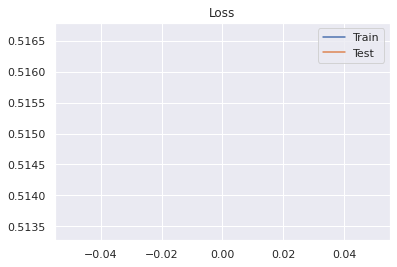

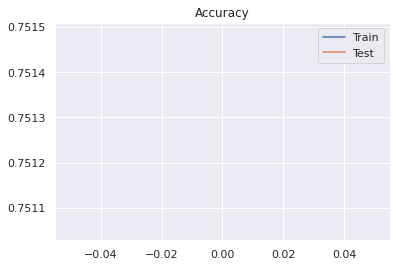

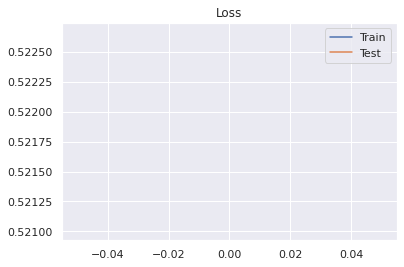

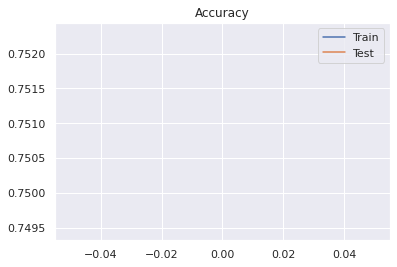

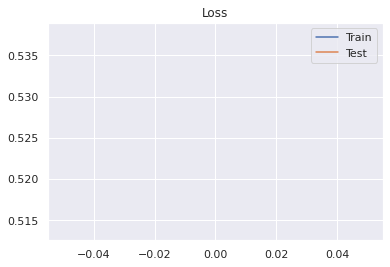

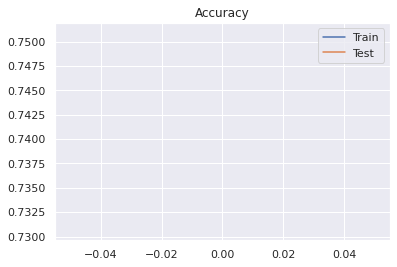

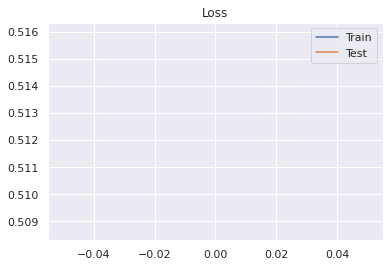

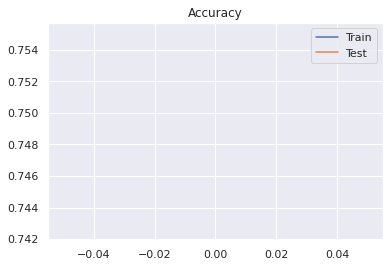

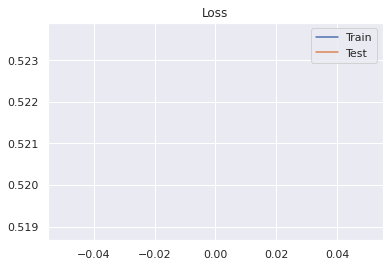

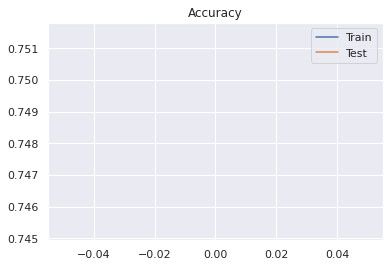

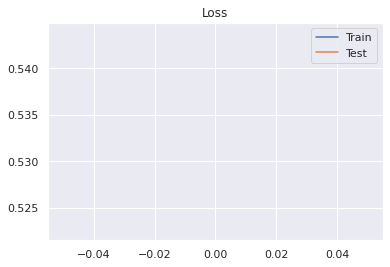

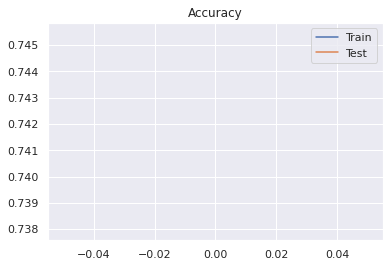

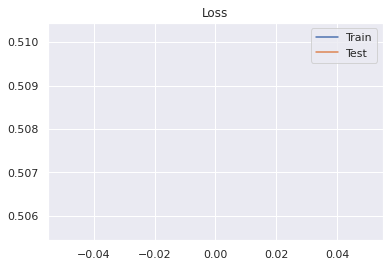

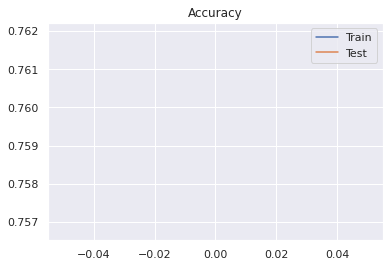

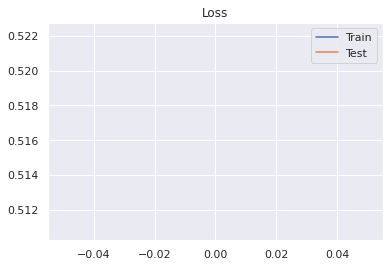

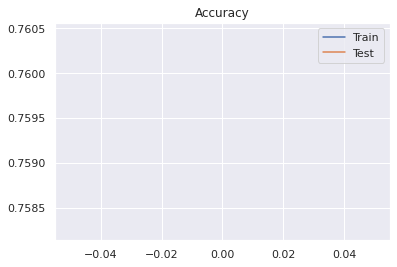

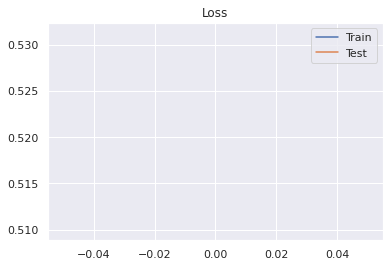

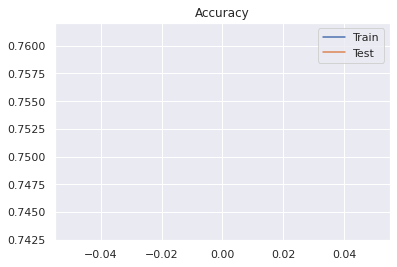

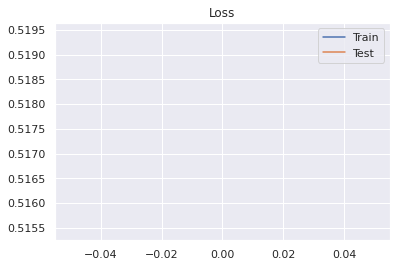

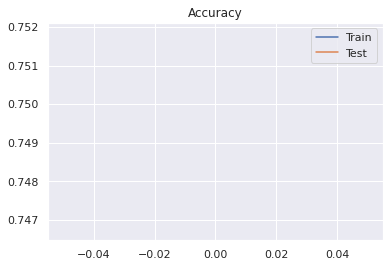

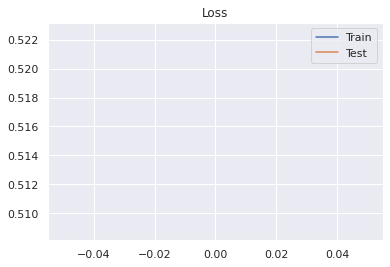

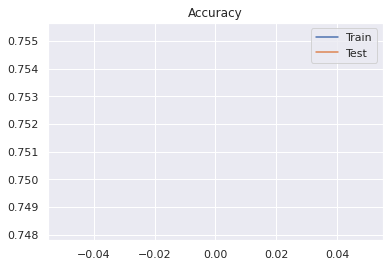

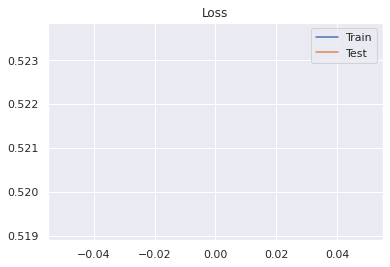

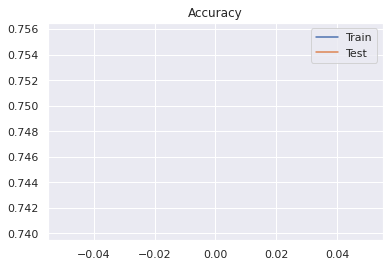

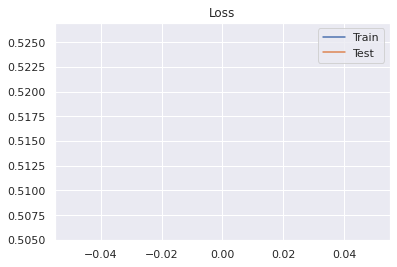

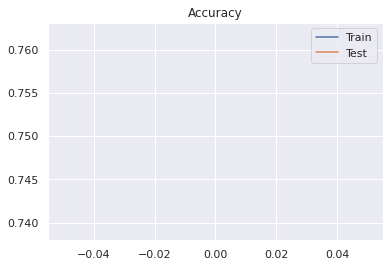

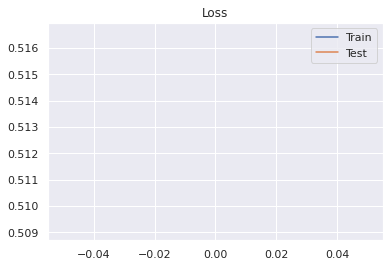

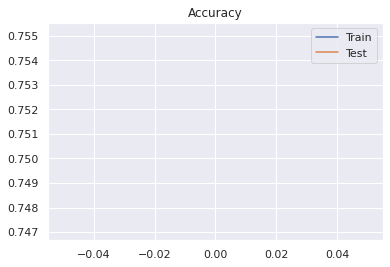

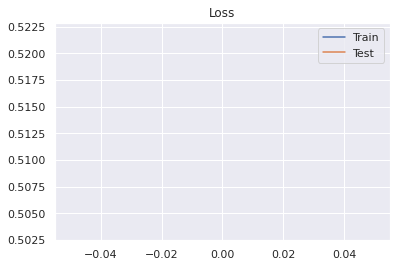

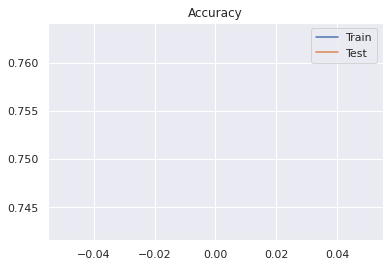

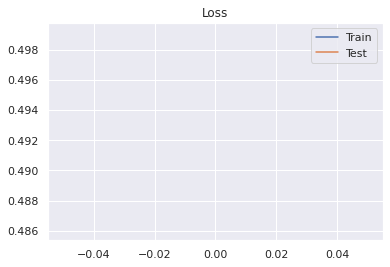

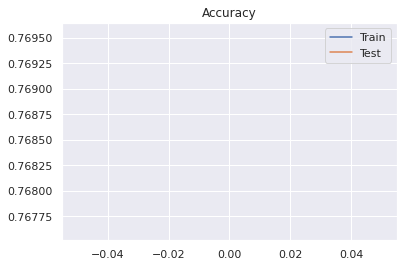

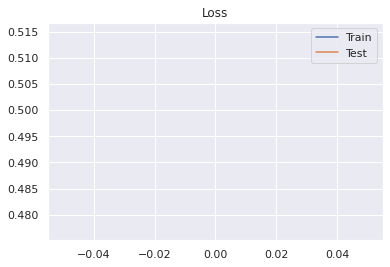

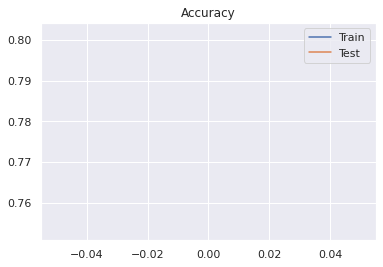

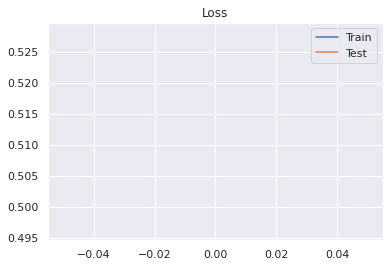

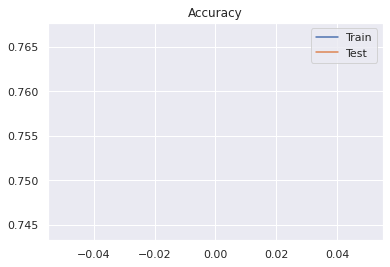

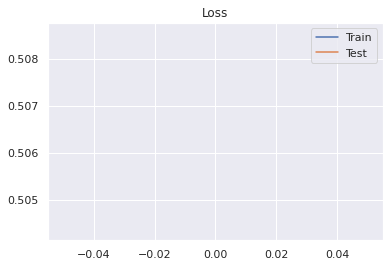

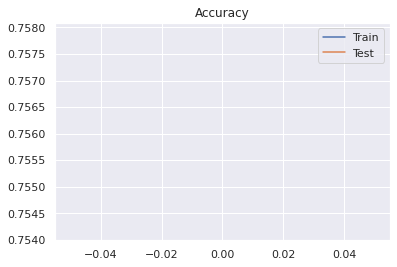

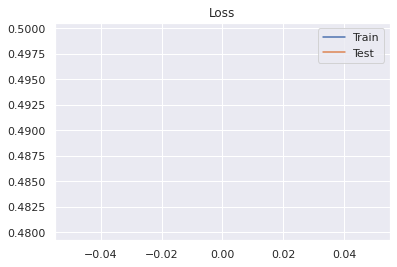

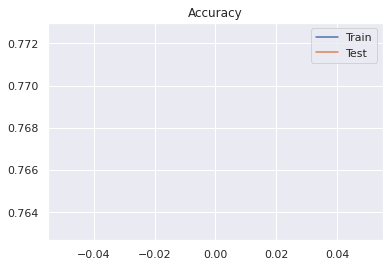

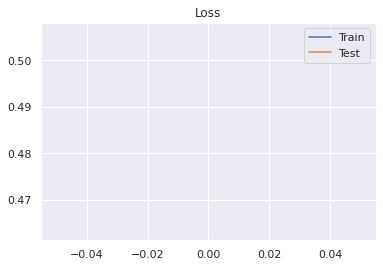

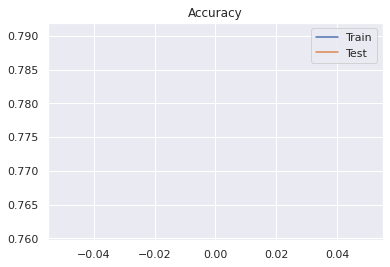

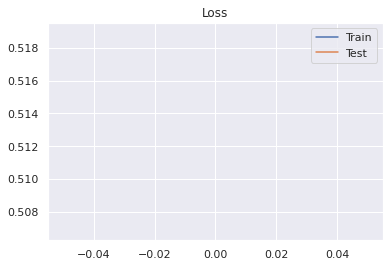

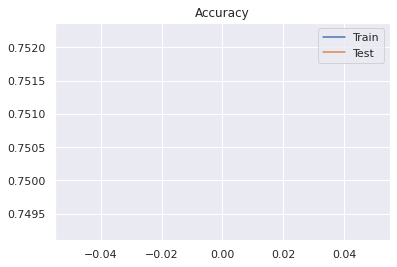

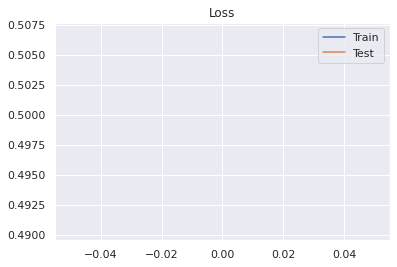

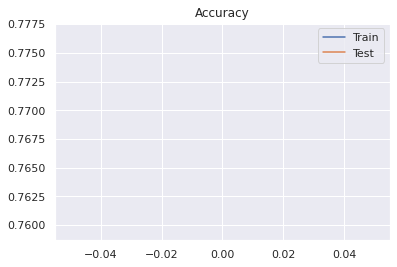

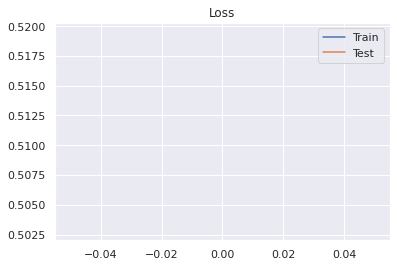

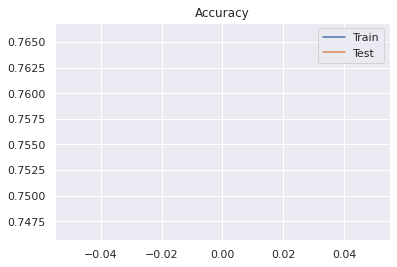

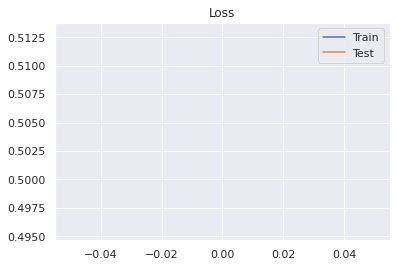

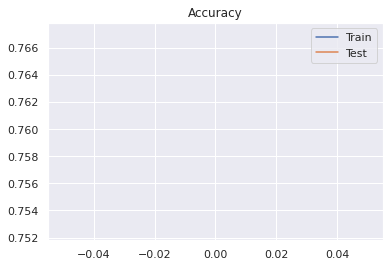

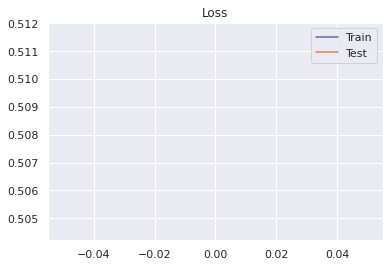

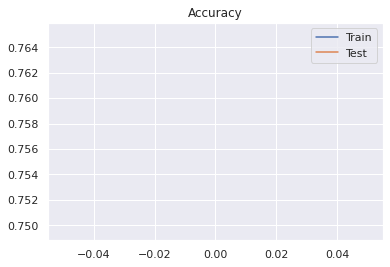

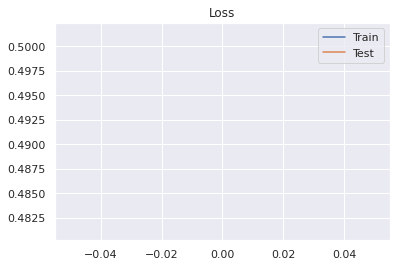

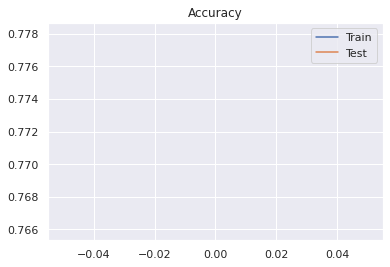

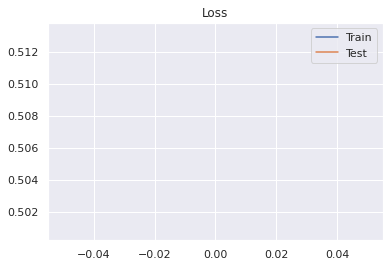

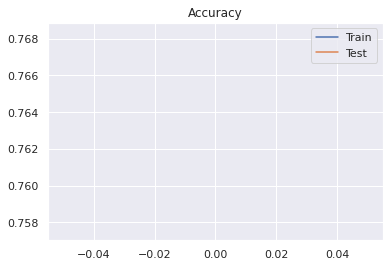

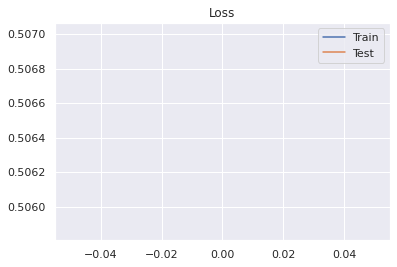

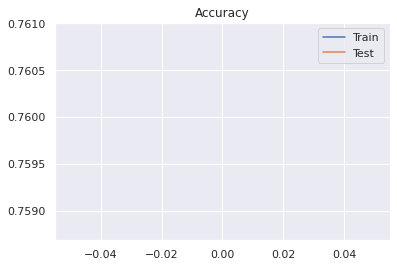

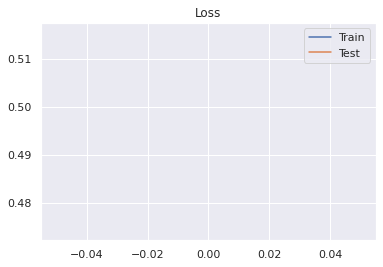

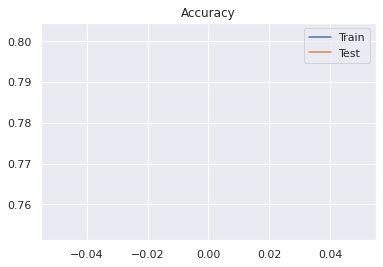

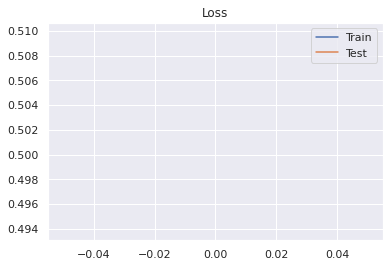

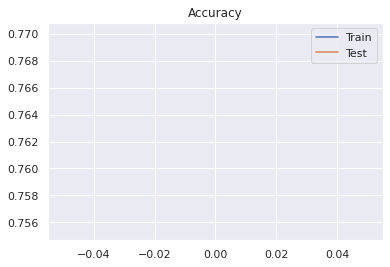

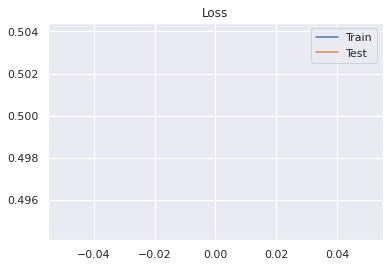

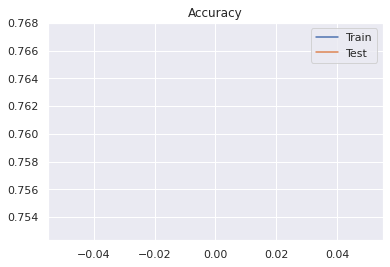

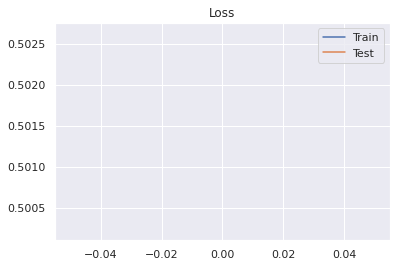

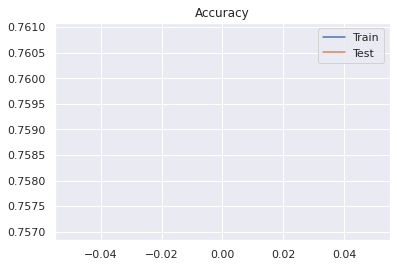

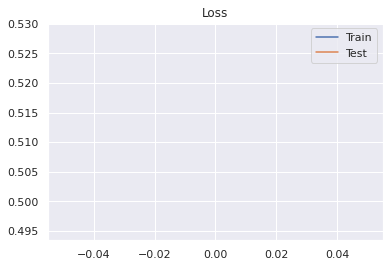

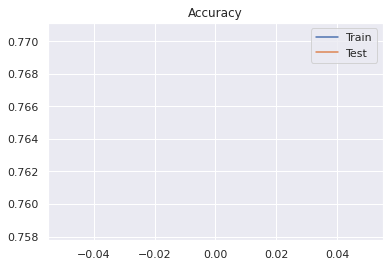

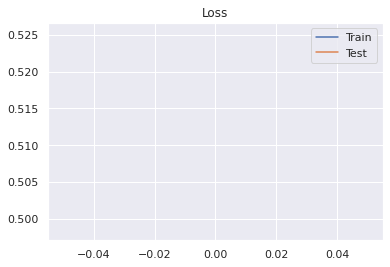

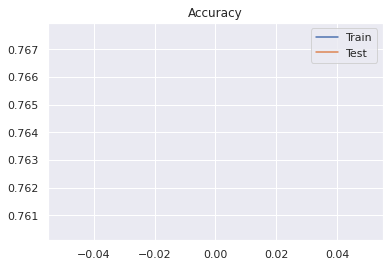

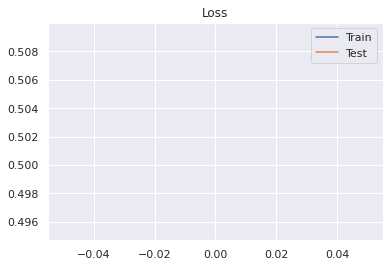

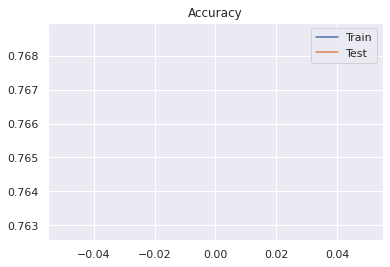

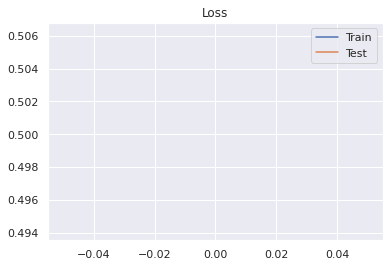

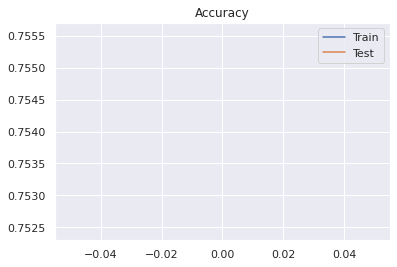

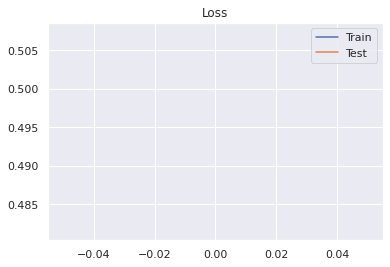

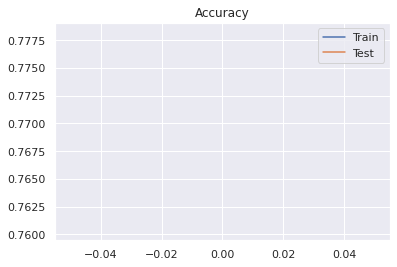

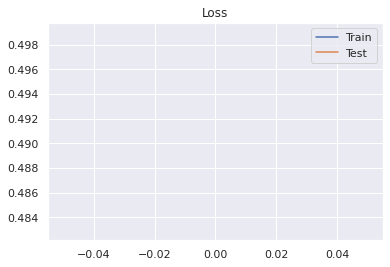

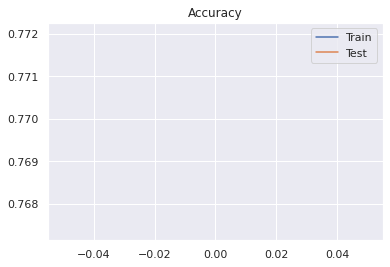

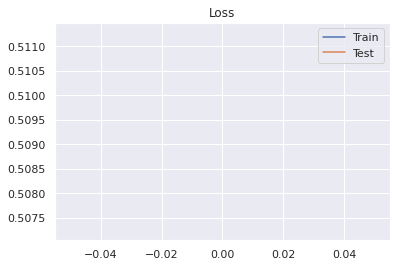

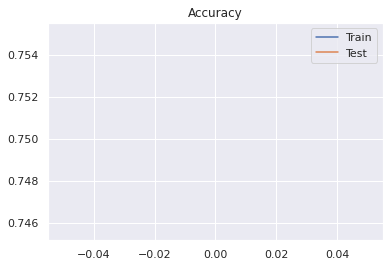

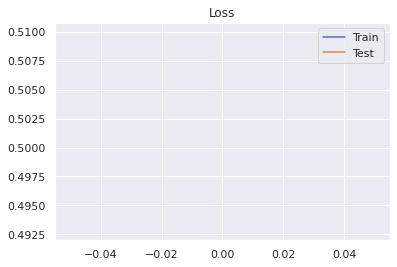

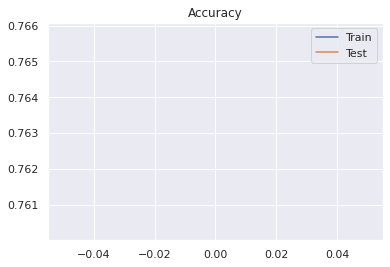

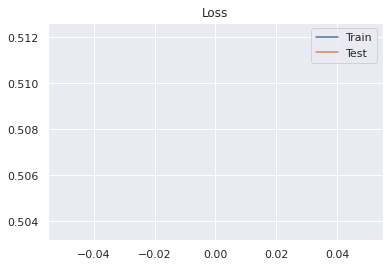

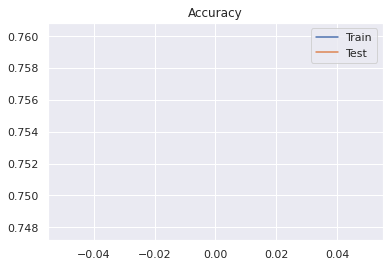

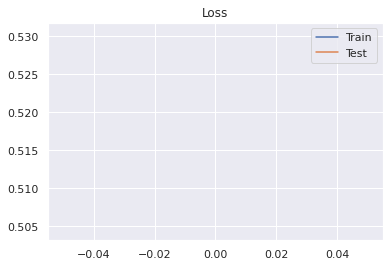

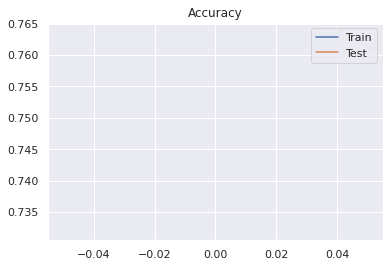

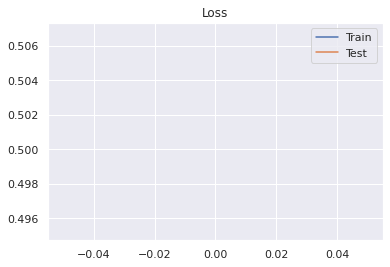

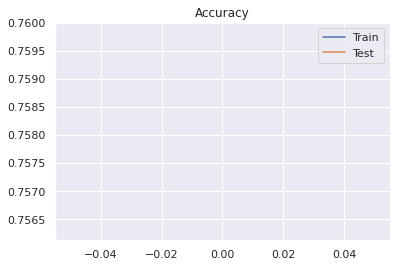

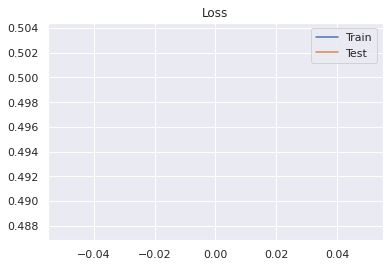

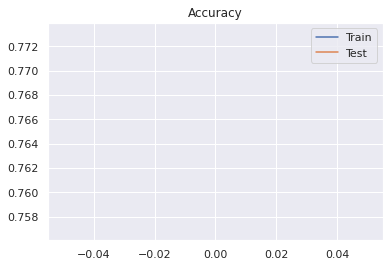

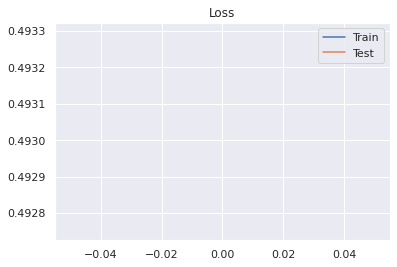

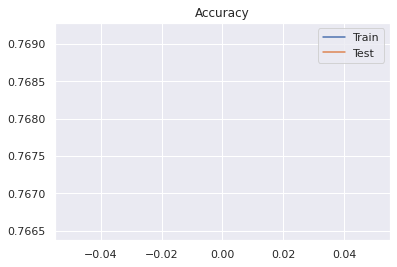

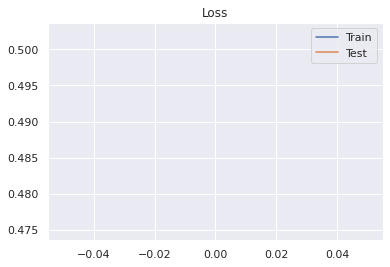

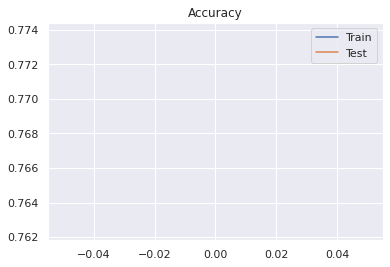

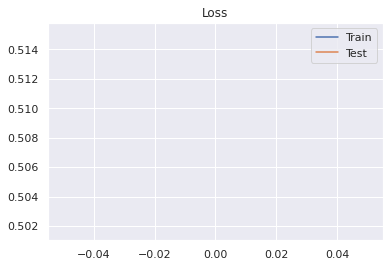

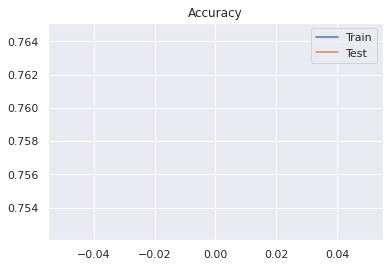

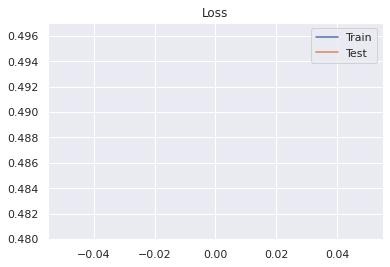

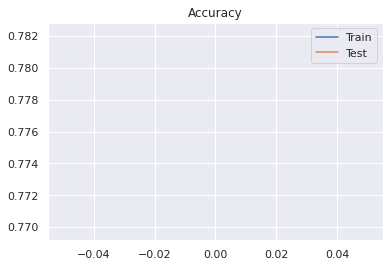

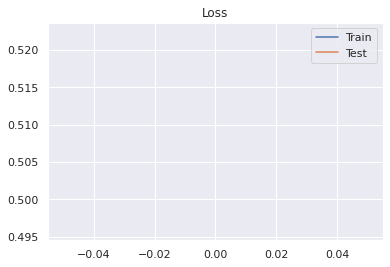

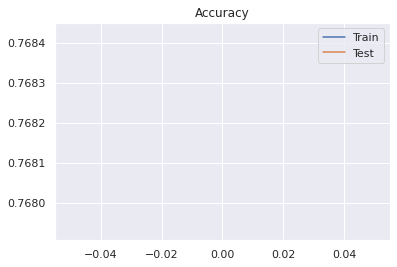

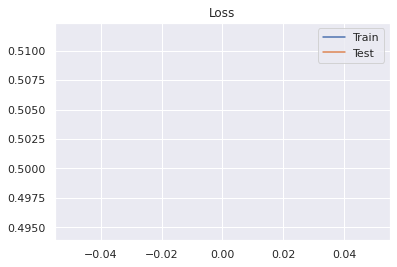

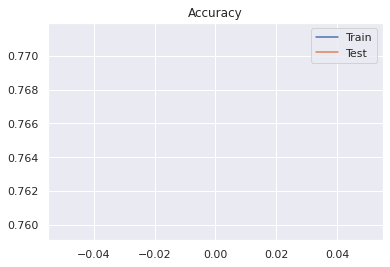

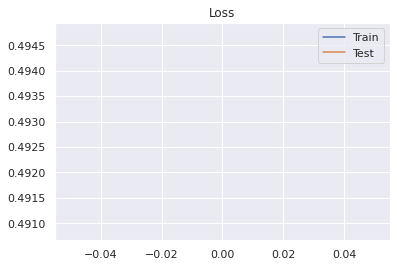

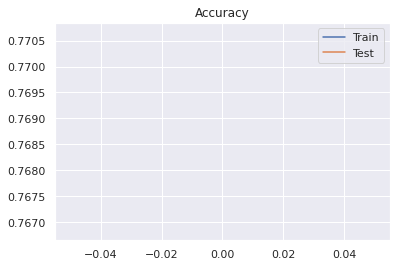

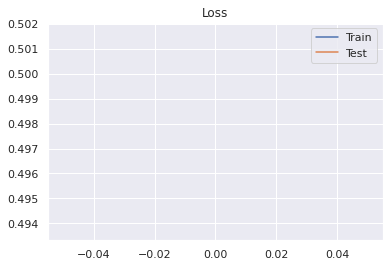

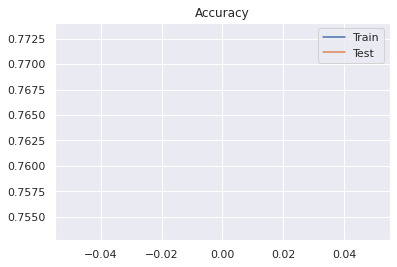

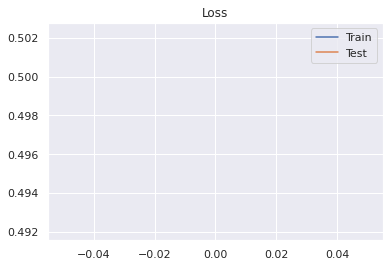

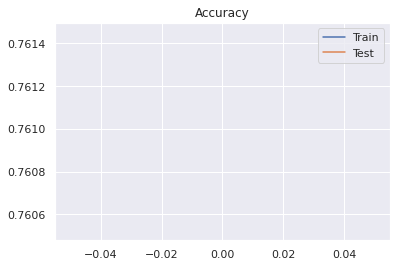

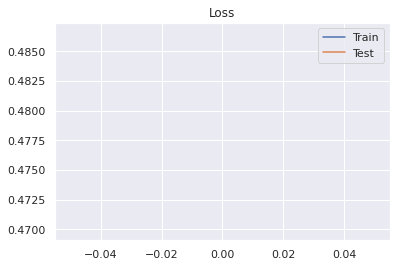

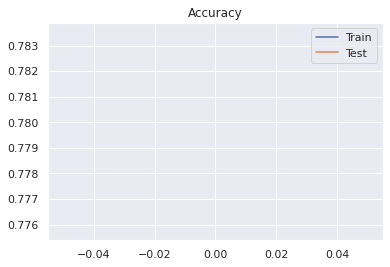

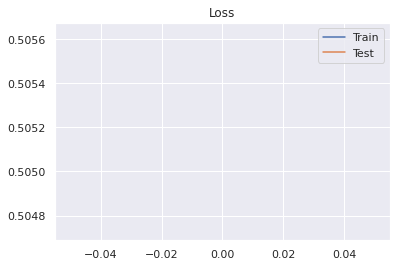

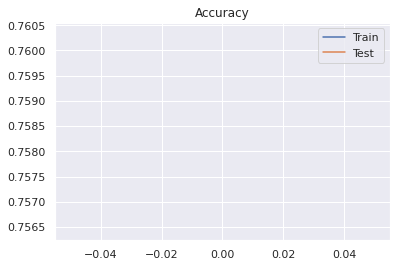

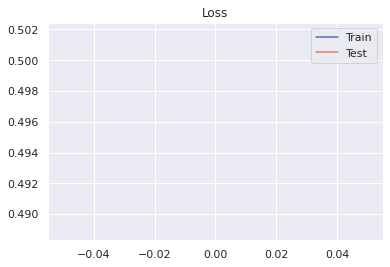

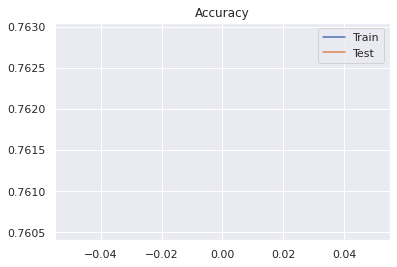

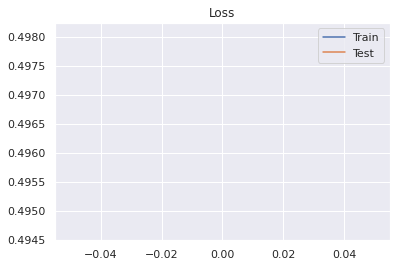

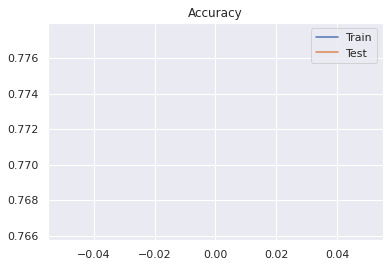

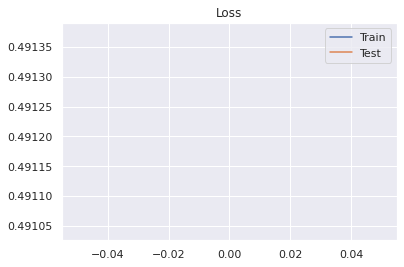

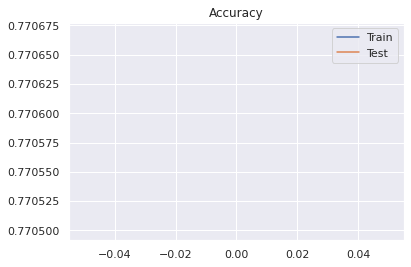

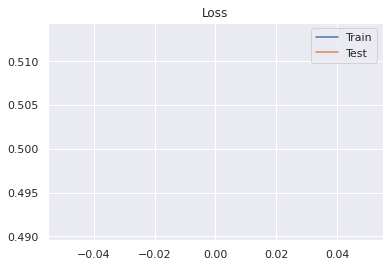

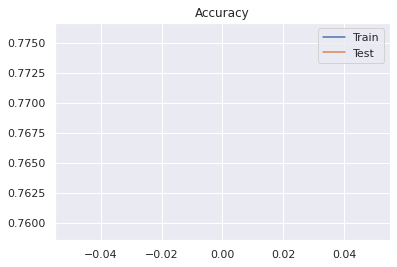

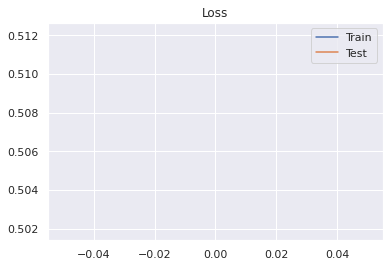

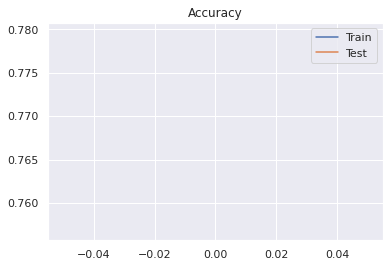

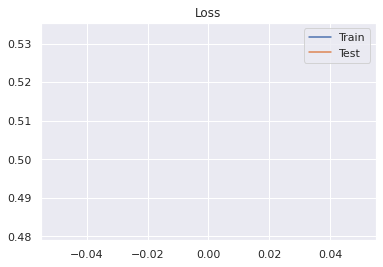

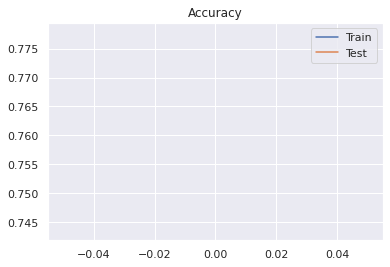

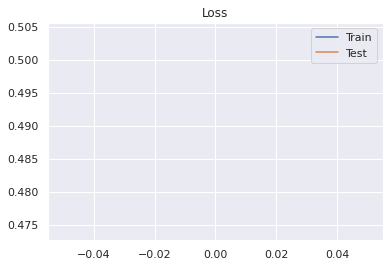

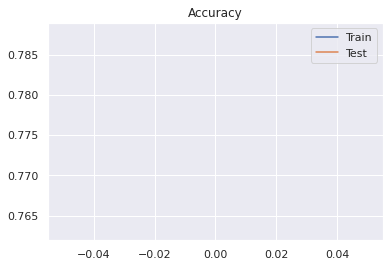

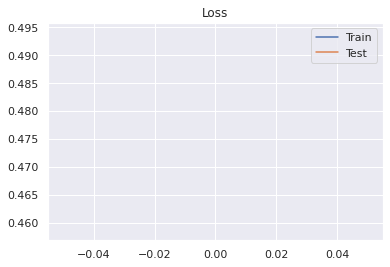

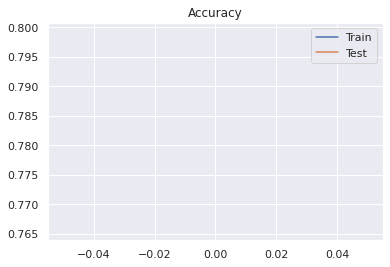

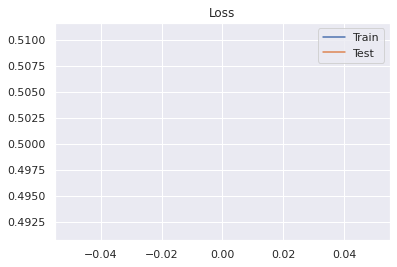

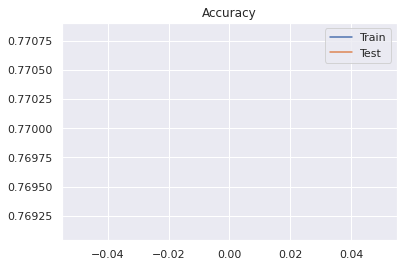

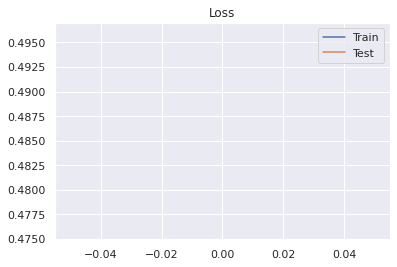

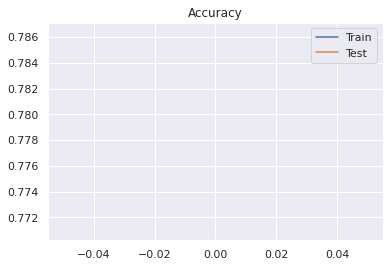

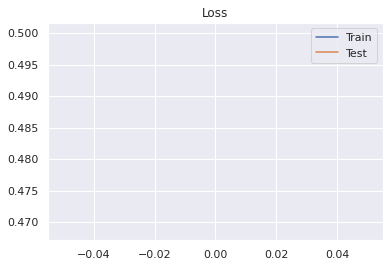

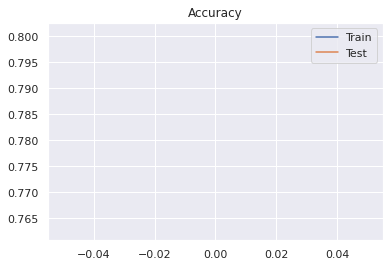

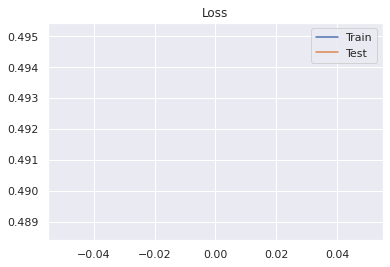

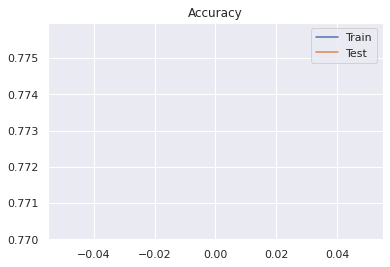

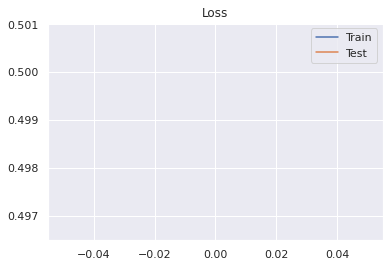

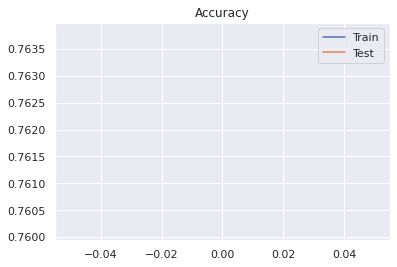

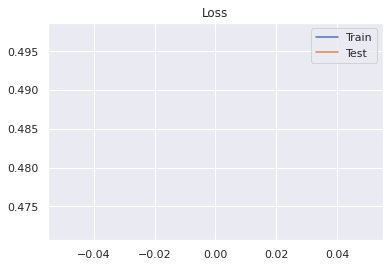

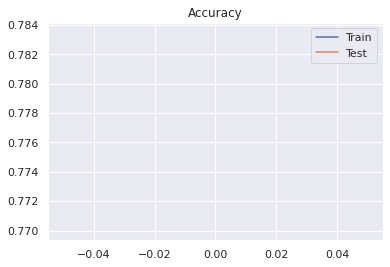

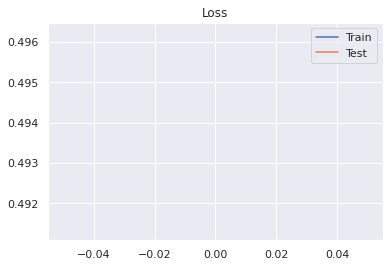

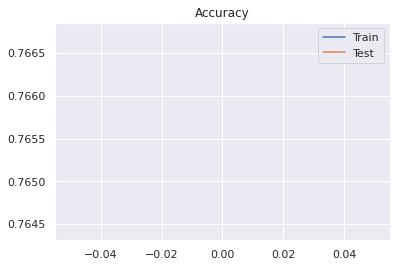

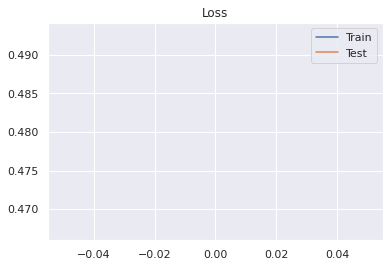

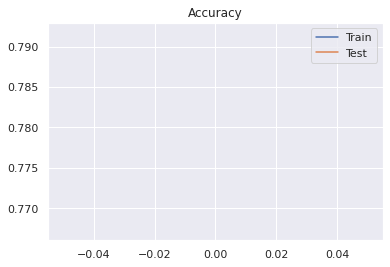

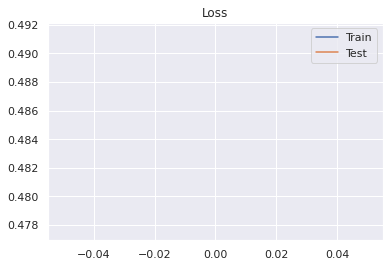

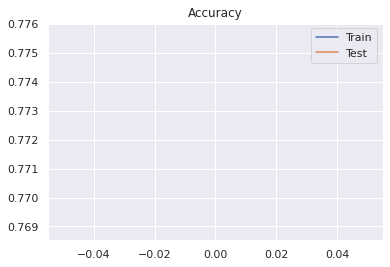

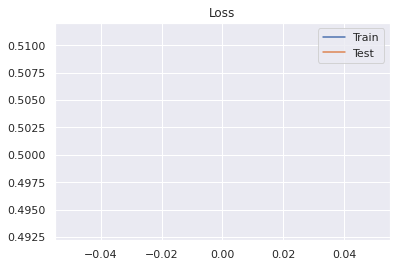

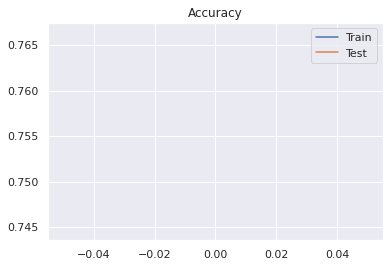

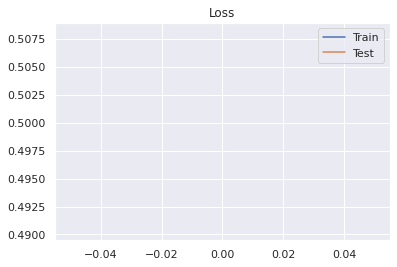

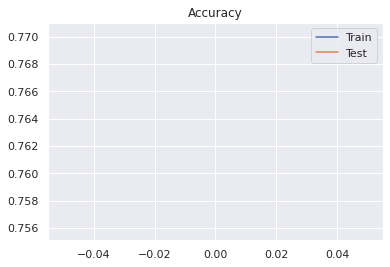

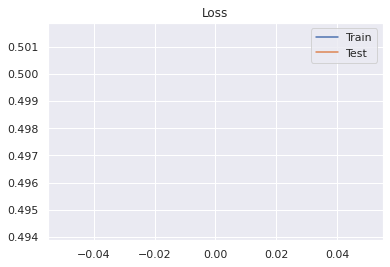

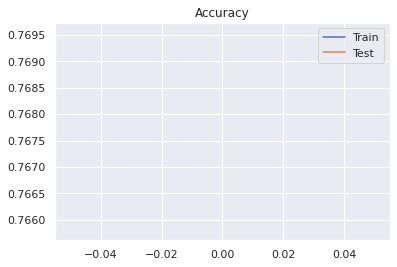

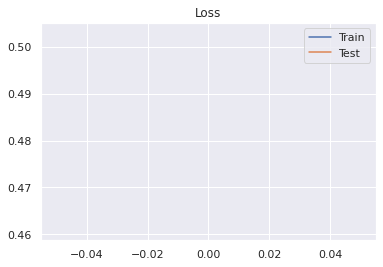

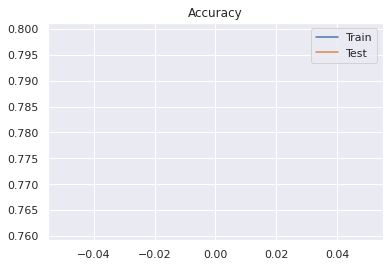

In [5]:
for _ in range(total_curves//500):
    ids=np.random.choice(total_curves,500,replace=False)
    encoder=tnc.learn_encoder(train[ids], encoder,disc_model,optimizer, window_size, w, lr=1e-3, decay=1e-5, n_epochs=0,
                  mc_sample_size=40, path='gp', device=device, augmentation=5, n_cross_val=1)

In [6]:
test_windowed.shape

NameError: name 'test_windowed' is not defined

In [ ]:
y0s=[]
labs=[]
for k_id in range(14):

  K,n=sample_comp_kernel(k_i=k_id) if k_id!=13 else sample_mix_kernel()
  y0=sample_gaussian(2000,C=K.cov(xs,xs)+n*np.eye(len(xs)))
  y0s.append(y0)
  labs=labs+[k_id]*len(y0)

y0s=np.concatenate(y0s,0)
labs=np.array(labs)
rp=np.random.permutation(len(y0s))
y0s=y0s[rp]
labs=labs[rp]
test=rand_rescale(y0s)[:,None,:]
#since this encoder learns repreentations of windows, it might be fairer to extract reps of all windows
#and then average them
test_windowed=[]
for r in test:
    windows=[]
    for j in range(window_size//2,test.shape[2]-window_size//2,window_size):
        windows.append(r[:,j:j+window_size])
    windows=np.vstack(windows)
    test_windowed.append(windows[None,:,:])
#shape: n curves x 1 x windows per curve x window length
test_windowed=np.array(test_windowed)


In [ ]:
import torch
with torch.no_grad():
    z=torch.cat([encoder(torch.from_numpy(test[i:i+100]).float()) for i in range(0,len(test),100)],0)
    z_windowed=[]
    for window_id in range(test_windowed.shape[2]): 
        #representation of the ith window for each curve
        zw=encoder(torch.from_numpy(test_windowed[:,:,window_id]).float())
        z_windowed.append(zw.unsqueeze(2))
    z_windowed=torch.cat(z_windowed,axis=2)
    z_windowed=torch.mean(z_windowed,axis=2).cpu()
    z=z.cpu()

In [ ]:
z.shape,labs.shape

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf=SGDClassifier(loss='log',alpha=10**-5)

In [ ]:
clf.fit(z[:len(z)//2],labs[:len(z)//2])

In [ ]:
clf.score(z[len(z)//2:],labs[len(z)//2:])

In [ ]:
clf.fit(z_windowed[:len(z)//2],labs[:len(z)//2])

In [ ]:
clf.score(z_windowed[len(z)//2:],labs[len(z)//2:])